Goal: 
1. To make sure that CAF, immune, and epithelial cell information is saved per image under 'description.csv' in the 000_Data/transformed_coor folder, for easy matching.
2. To import epithelial dataset, transformed CAF dataset, and transformed immune dataset.
3. Calculate all distances, and then output all pairs of cells that have centers within 21px of each other (by euclidean distance).
4. Visualize three segmented images, with the patches of neighbours illuminated.

In [69]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from scipy.spatial.distance import cdist

In [70]:
#divide the large epithelial csv into smaller csvs
# Load the CSV file into a DataFrame
#csv_file = '/Users/ferris/Desktop/PDAC-Analysis/99_GitHub/00_TMA_reusable_data/2022_PDAC_TMA_compensated_ungated_cells_no6.csv'
#df = pd.read_csv(csv_file)

# Get the unique values in the 'sample' column
#unique_samples = df['description'].unique()

# Loop through each unique sample value
#for sample in unique_samples:
    # Filter the DataFrame for rows with the current sample value
#    sample_df = df[df['description'] == sample]
    
    # Create a file name based on the sample value
#    output_file = f'/Users/ferris/Desktop/Serial Section Overlay/000_Data/transformed_coor/epithelial_original_coor/{sample}.csv'
    
    # Save the filtered DataFrame to a new CSV file
#    sample_df.to_csv(output_file, index=False)

#print("Files have been saved successfully.")

In [71]:
# Define the folder paths
#csv_file = 'adata_PDAC_lymphoid_and_myeloid_annotations_AUG2024_with_descr_and_overlay_labels.csv'

# Read the CSV file
#df = pd.read_csv(csv_file)
# Subset the CSV file to only rows where Labels is 'Epithelial cells' or 'Immune cells'
#df_subset = df[df['Labels'].isin(['Epithelial cells', 'Immune cells'])]
# Further subset to only rows where immune_object_id is NOT zero OR Labels is 'Immune cells'
#df_subset = df_subset[(df_subset['immune_object_id'] != 0) | (df_subset['Labels'] == "Immune cells")]


# Directory to save the output files
#output_dir = "distance_matrices"
#os.makedirs(output_dir, exist_ok=True)

#sample_id_list = df_subset['sample'].unique()

In [97]:
# Function to compute distances and filter results
def compute_distances(coords1, ids1, coords2, ids2):
    distances = cdist(coords1, coords2, metric='euclidean')
    results = []
    for i, id1 in enumerate(ids1):
        for j, id2 in enumerate(ids2):
            if distances[i, j] <= 21: #here is where I keep my cut_off!
                results.append({
                    'cell_id_1': id1,
                    'cell_id_2': id2,
                    'distance': distances[i, j]
                })
    return pd.DataFrame(results)

# Define a function to calculate distances and save the filtered results
def calculate_and_save_distances(file_name):
    try:
    # Construct the full file paths
        ep_file_path = os.path.join('000_Data/transformed_coor/ep_rot_pad_trans_2', file_name)
        im_file_path = os.path.join('000_Data/transformed_coor/immune_rot_pad_trans', file_name)
        caf_file_path = os.path.join('000_Data/transformed_coor/CAF_rot_pad_trans', file_name)
    
    # Load the matching CSV files into DataFrames
        ep_df = pd.read_csv(ep_file_path)
        im_df = pd.read_csv(im_file_path)
        caf_df = pd.read_csv(caf_file_path)
    
        print(len(ep_df), len(im_df), len(caf_df))    
   
    # Extract coordinates and IDs
        epithelial_coords = ep_df[['x_rot_pad', 'y_rot_pad']].values
        epithelial_ids = ep_df['CellNb'].values
        immune_coords = im_df[['x_rot_pad_trans', 'y_rot_pad_trans']].values
        immune_ids = im_df['cell_id'].values
        caf_coords = caf_df[['x_rot_pad_trans', 'y_rot_pad_trans']].values
        caf_ids = caf_df['cell_id'].values

    # Calculate distances between epithelial and immune cells
        ep_im_distances = compute_distances(epithelial_coords, epithelial_ids, immune_coords, immune_ids)
    
    # Calculate distances between epithelial and CAF cells
        ep_caf_distances = compute_distances(epithelial_coords, epithelial_ids, caf_coords, caf_ids)
    
    # Calculate distances between immune and CAF cells
        im_caf_distances = compute_distances(immune_coords, immune_ids, caf_coords, caf_ids)
    
    # Save the results to CSV files
        distances_folder = 'distances'
        os.makedirs(distances_folder, exist_ok=True)
    
        ep_im_file = os.path.join(distances_folder, f'{file_name}_ep_im_distances.csv')
        ep_caf_file = os.path.join(distances_folder, f'{file_name}_ep_caf_distances.csv')
        im_caf_file = os.path.join(distances_folder, f'{file_name}_im_caf_distances.csv')
    
        ep_im_distances.to_csv(ep_im_file, index=False)
        ep_caf_distances.to_csv(ep_caf_file, index=False)
        im_caf_distances.to_csv(im_caf_file, index=False)
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [103]:
# Define a function to calculate distances and save the filtered results
def calculate_and_save_distances_2(file_name):
    try:
    # Construct the full file paths
        ep_file_path = os.path.join('000_Data/transformed_coor/ep_rot_pad_trans_2', file_name)
        im_file_path = os.path.join('000_Data/transformed_coor/immune_rot_pad_trans', file_name)
        caf_file_path = os.path.join('000_Data/transformed_coor/CAF_rot_pad_trans', file_name)
    
    # Load the matching CSV files into DataFrames
        ep_df = pd.read_csv(ep_file_path)
        im_df = pd.read_csv(im_file_path)
        caf_df = pd.read_csv(caf_file_path)
    
        print(len(ep_df), len(im_df), len(caf_df))    
   
    # Extract coordinates and IDs
        epithelial_coords_for_im = ep_df[['x_rot_pad_trans_im', 'y_rot_pad_trans_im']].values
        epithelial_ids = ep_df['CellNb'].values
        epithelial_coords_for_caf = ep_df[['x_rot_pad_trans_caf', 'y_rot_pad_trans_caf']].values
        
        epithelial_ids = ep_df['CellNb'].values
        immune_coords = im_df[['x_rot_pad', 'y_rot_pad']].values
        immune_ids = im_df['cell_id'].values
        caf_coords = caf_df[['x_rot_pad', 'y_rot_pad']].values
        caf_ids = caf_df['cell_id'].values

    # Calculate distances between epithelial and immune cells
        ep_im_distances = compute_distances(epithelial_coords_for_im, epithelial_ids, immune_coords, immune_ids)
    
    # Calculate distances between epithelial and CAF cells
        ep_caf_distances = compute_distances(epithelial_coords_for_caf, epithelial_ids, caf_coords, caf_ids)
    
    # Calculate distances between immune and CAF cells
        im_caf_distances = compute_distances(immune_coords, immune_ids, caf_coords, caf_ids)
    
    # Save the results to CSV files
        distances_folder = 'distances_2'
        os.makedirs(distances_folder, exist_ok=True)
    
        ep_im_file = os.path.join(distances_folder, f'{file_name}_ep_im_distances.csv')
        ep_caf_file = os.path.join(distances_folder, f'{file_name}_ep_caf_distances.csv')
        im_caf_file = os.path.join(distances_folder, f'{file_name}_im_caf_distances.csv')
    
        ep_im_distances.to_csv(ep_im_file, index=False)
        ep_caf_distances.to_csv(ep_caf_file, index=False)
        im_caf_distances.to_csv(im_caf_file, index=False)
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [98]:
# Calculate each unique pair, from each dataset to each other dataset!
# Size of each subset
#this path doesn't matter! it only extracts file name.
folder_path = '000_Data/transformed_coor/epithelial_original_coor' #this name doesn't matter! It only extracts filename

# Get a list of all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file_name in file_list:
    calculate_and_save_distances(file_name)
    
#1:33 to 4:09
#it likely takes 2h40 to fully finish, so it should finish at 5:15ish, and I should get my visualization before I go home

4715 9481 10256
1675 2755 3803
2337 4382 5654
541 1900 2460
1120 1671 2347
4232 10201 11436
4233 7640 9266
4343 9485 10350
1780 2822 3457
2449 2491 4983
4533 7671 8566
792 1997 2802
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver8_Sector1Row1Column1_SlideEnd.csv'
4806 10618 11237
993 1844 4892
2226 2627 4801
1121 2014 3150
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC3_Sector2Row1Column3_Punch2_Case82_ID_G_23381.csv'
4884 10369 11597
1930 2740 4341
3541 8662 9710
4369 7909 9696
2987 5433 6550
691 2176 2791
3549 6148 6748
3841 7043 7370
1728 2796 5509
2450 3806 5027
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney1_Sector4Row4Column1_SlideEnd.csv'
3000 5307 6528
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC7_Sector2Row7Column1_Punch2_Case225_ID_GSDM_2525.csv'
4

1166 1722 3223
1145 6301 7466
755 1000 2099
2410 6211 6918
3245 5325 6331
4205 6058 7195
1774 2729 4538
2935 4984 6083
4622 9011 8077
4039 6690 7639
2879 4461 5767
3007 5429 6878
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney3_Sector4Row4Column4_SlideEnd.csv'
2448 3704 4679
2478 3293 6088
3422 5608 7266
2568 4744 6157
3019 5339 6828
3671 8438 6588
3273 5646 6487
3677 8757 9007
2016 3594 4495
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney3_Sector4Row4Column3_SlideEnd.csv'
4070 8036 9073
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver8_Sector1Row1Column2_SlideStart.csv'
3661 7973 8497
1444 2321 4457
3312 5185 7648
1223 1760 3177
3613 7297 8513
1167 1697 3911
1548 2798 4611
4165 9335 9644
3260 6539 7416
2760 5182 5983
1102 7569 8980
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_ro

2475 4246 5941
1221 2534 2840
3049 4890 5752
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney4_Sector4Row4Column5_SlideStart.csv'
1356 6217 7744
1800 2494 3717
1860 2726 3810
131 196 446
2375 3886 5252
1401 5068 6552
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver4_Sector1Row1Column4_SlideMiddle.csv'
2155 3733 4913
3007 4401 5592
3252 6180 7732
550 909 1944
3654 7116 8277
2126 3371 5148
2448 8661 10718
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver2_Sector1Row1Column3_SlideMiddle.csv'
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC5_Sector3Row3Column3_Punch4_Case20_ID_1_4567 - split.csv'
2929 5874 6976
1200 2606 4079
5204 10122 11284
4088 7642 8538
2727 4491 4481
4819 9768 10494
3177 5580 6538
1963 3127 4887
3030 5026 6314
4546 9124 9631
2018 4501 6351
4115 7693

217 598 530
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney4_Sector4Row4Column4_SlideEnd.csv'
2755 4159 5584
2144 3513 5132
1082 1471 2569
3081 5136 6598
3546 6715 8170
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney1_Sector4Row4Column2_SlideMiddle.csv'
3383 5521 6690
3683 5777 6340
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver5_Sector1Row1Column5_SlideEnd.csv'
3461 5941 7205
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC7_Sector1Row1Column4_Punch1_Case167_ID_1_105541.csv'
1714 3271 4847
579 1080 1462
3858 7743 8774
233 745 1776
3308 6716 7169
1057 4240 5823
3346 5561 6171
3297 5608 6838
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney8_Sector2Row8Column9_SlideEnd.csv'
File not found: [Errno 2] No such

In [107]:
#TRY AGAIN, with the ROT_PAD_TRANSFORMED epithelial data and the ROT_PAD caf/immune data being the ones that get lined up!

#THESE ARE THE ONES THAT WORK!!!!

#this path doesn't matter! it only extracts file name.
folder_path = '000_Data/transformed_coor/epithelial_original_coor' #this name doesn't matter! It only extracts filename

# Get a list of all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Calculate each unique pair, from each dataset to each other dataset!
for file_name in file_list:
    calculate_and_save_distances_2(file_name) #using the second version of this function

4715 9481 10256
1675 2755 3803
2337 4382 5654
541 1900 2460
1120 1671 2347
4232 10201 11436
4233 7640 9266
4343 9485 10350
1780 2822 3457
2449 2491 4983
4533 7671 8566
792 1997 2802
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver8_Sector1Row1Column1_SlideEnd.csv'
4806 10618 11237
993 1844 4892
2226 2627 4801
1121 2014 3150
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC3_Sector2Row1Column3_Punch2_Case82_ID_G_23381.csv'
4884 10369 11597
1930 2740 4341
3541 8662 9710
4369 7909 9696
2987 5433 6550
691 2176 2791
3549 6148 6748
3841 7043 7370
1728 2796 5509
2450 3806 5027
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney1_Sector4Row4Column1_SlideEnd.csv'
3000 5307 6528
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC7_Sector2Row7Column1_Punch2_Case225_ID_GSDM_2525.csv'
4

1166 1722 3223
1145 6301 7466
755 1000 2099
2410 6211 6918
3245 5325 6331
4205 6058 7195
1774 2729 4538
2935 4984 6083
4622 9011 8077
4039 6690 7639
2879 4461 5767
3007 5429 6878
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney3_Sector4Row4Column4_SlideEnd.csv'
2448 3704 4679
2478 3293 6088
3422 5608 7266
2568 4744 6157
3019 5339 6828
3671 8438 6588
3273 5646 6487
3677 8757 9007
2016 3594 4495
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney3_Sector4Row4Column3_SlideEnd.csv'
4070 8036 9073
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver8_Sector1Row1Column2_SlideStart.csv'
3661 7973 8497
1444 2321 4457
3312 5185 7648
1223 1760 3177
3613 7297 8513
1167 1697 3911
1548 2798 4611
4165 9335 9644
3260 6539 7416
2760 5182 5983
1102 7569 8980
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_ro

2475 4246 5941
1221 2534 2840
3049 4890 5752
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney4_Sector4Row4Column5_SlideStart.csv'
1356 6217 7744
1800 2494 3717
1860 2726 3810
131 196 446
2375 3886 5252
1401 5068 6552
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver4_Sector1Row1Column4_SlideMiddle.csv'
2155 3733 4913
3007 4401 5592
3252 6180 7732
550 909 1944
3654 7116 8277
2126 3371 5148
2448 8661 10718
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver2_Sector1Row1Column3_SlideMiddle.csv'
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC5_Sector3Row3Column3_Punch4_Case20_ID_1_4567 - split.csv'
2929 5874 6976
1200 2606 4079
5204 10122 11284
4088 7642 8538
2727 4491 4481
4819 9768 10494
3177 5580 6538
1963 3127 4887
3030 5026 6314
4546 9124 9631
2018 4501 6351
4115 7693

217 598 530
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney4_Sector4Row4Column4_SlideEnd.csv'
2755 4159 5584
2144 3513 5132
1082 1471 2569
3081 5136 6598
3546 6715 8170
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney1_Sector4Row4Column2_SlideMiddle.csv'
3383 5521 6690
3683 5777 6340
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Liver5_Sector1Row1Column5_SlideEnd.csv'
3461 5941 7205
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/PDAC7_Sector1Row1Column4_Punch1_Case167_ID_1_105541.csv'
1714 3271 4847
579 1080 1462
3858 7743 8774
233 745 1776
3308 6716 7169
1057 4240 5823
3346 5561 6171
3297 5608 6838
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/ep_rot_pad_trans_2/Kidney8_Sector2Row8Column9_SlideEnd.csv'
File not found: [Errno 2] No such

In [94]:
#Next, make sure I also have files of epithelial to itself, immune to itself, and caf to itself 
#(filtered to be unique pairs only!)
def calculate_and_save_unique_cell_distances(file_name, folder_path, tag):
    try:
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        epithelial_coords = ep_df[['x_slide', 'y_slide']].values
        epithelial_ids = ep_df['CellNb'].values
        immune_coords = im_df[['x', 'y']].values
        immune_ids = im_df['cell_id'].values
        caf_coords = caf_df[['x', 'y']].values
        caf_ids = caf_df['cell_id'].values

        
        # Check for coordinate columns
        if {'x', 'y'}.issubset(df.columns):
            coords = df[['x', 'y']].values
        elif {'x_slide', 'y_slide'}.issubset(df.columns):
            coords = df[['x_slide', 'y_slide']].values
        else:
            raise ValueError("No suitable coordinate columns found.")
        
        # Check for cell ID columns
        if 'cell_id' in df.columns:
            ids = df['cell_id'].values
        elif 'CellNb' in df.columns:
            ids = df['CellNb'].values
        else:
            raise ValueError("No suitable cell ID columns found.")
        
        # Compute pairwise distances
        distances = cdist(coords, coords, metric='euclidean')
        
        # Create a DataFrame for storing results
        results = []
        
        # Iterate over unique pairs of indices
        num_cells = len(ids)
        for i in range(num_cells):
            for j in range(i + 1, num_cells):
                distance = distances[i, j]
                if distance <= 21:
                    results.append({
                        'cell_id_1': ids[i],
                        'cell_id_2': ids[j],
                        'distance': distance
                    })
        
        # Convert results to DataFrame
        results_df = pd.DataFrame(results)
        
        # Save the results to a CSV file
        distances_folder = 'distances'
        os.makedirs(distances_folder, exist_ok=True)
        
        output_file = os.path.join(distances_folder, f'{file_name}_{tag}_distances.csv')
        results_df.to_csv(output_file, index=False)
        
        print(f"Processed {file_name} successfully. Results saved to {output_file}.")
        
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [79]:
# Example usage with your file list and folder path
folder_path = '000_Data/transformed_coor/immune_rot_pad_trans'

for file_name in file_list:
    calculate_and_save_unique_cell_distances(file_name, folder_path, "im_im")

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/immune_rot_pad_trans/Liver4_Sector1Row1Column5_SlideStart.csv'
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_ro

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/immune_rot_pad_trans/Liver5_Sector1Row1Column6_SlideEnd.csv'
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/immune_rot_pad_trans/PDAC1_Sector4Row2Column8_Punch1_Case102_ID_G_8288 - split.csv'
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
File not found: [Errno 2] No such file or directory: '000_Data/transformed_coor/immune_rot_pad_trans/PDAC3_Sector2Row2Column1_Punch2_Case88_ID_G_26345 - split.csv'
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "

In [80]:
# Example usage with your file list and folder path
folder_path = '000_Data/transformed_coor/CAF_rot_pad_trans'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file_name in file_list:
    calculate_and_save_unique_cell_distances(file_name, folder_path, "caf_caf")

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] are in the [columns]"
An error occurred: "None of [Index(['x_rot_pad', 'y_rot_pad'], dtype='object')] ar

In [95]:
# Example usage with your file list and folder path
folder_path = '000_Data/transformed_coor/ep_rot_pad_trans_2'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file_name in file_list:
    calculate_and_save_unique_cell_distances(file_name, folder_path, "ep_ep")

An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occu

An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined
An error occurred: name 'im_df' is not defined


KeyboardInterrupt: 

# Make sure the neighbours make sense, by visual check!

In [83]:
#load sample_csvs that I want to pull descriptions from
#add a 'description' column
CAF_input_folder = "CAF_data/Sample_csvs"
# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(CAF_input_folder) if f.endswith('.csv')]
# Initialize an empty list to hold the DataFrames
dataframes = []
# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(CAF_input_folder, csv_file)
    df = pd.read_csv(file_path)  # Read the CSV into a DataFrame
    dataframes.append(df)       # Append to the list of DataFrames
# Concatenate all the DataFrames into one
caf_sample_mapping = pd.concat(dataframes, ignore_index=True)

In [84]:
# Path to the folder containing the CSV files
ep_input_folder = "IMC_Data_Ferris/Sample_csvs"

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(ep_input_folder) if f.endswith('.csv')]

# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(ep_input_folder, csv_file)
    df = pd.read_csv(file_path)  # Read the CSV into a DataFrame
    dataframes.append(df)       # Append to the list of DataFrames

# Concatenate all the DataFrames into one
ep_sample_mapping = pd.concat(dataframes, ignore_index=True)

In [85]:
immune_input_folder = "IMC_Data_Noor/Sample_csvs"

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(immune_input_folder) if f.endswith('.csv')]

# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(immune_input_folder, csv_file)
    df = pd.read_csv(file_path)  # Read the CSV into a DataFrame
    dataframes.append(df)       # Append to the list of DataFrames

# Concatenate all the DataFrames into one
im_sample_mapping = pd.concat(dataframes, ignore_index=True)

      cell_id_1  cell_id_2   distance
708         490        492  11.792294
1127        765        768  14.816511
1128        765        798  18.822262
1262        888        892  17.315244
1263        888        907  12.356771
1264        888        916  20.841454
                               TiffName  \
258  TMA_2022_PDAC8_s0_a24_ac_full.tiff   

                                                Sample         SampleName  
258  PDAC8_Sector2Row6Column5_Punch4_Case209_ID_G_3...  TMA_2022_PDAC8_24  


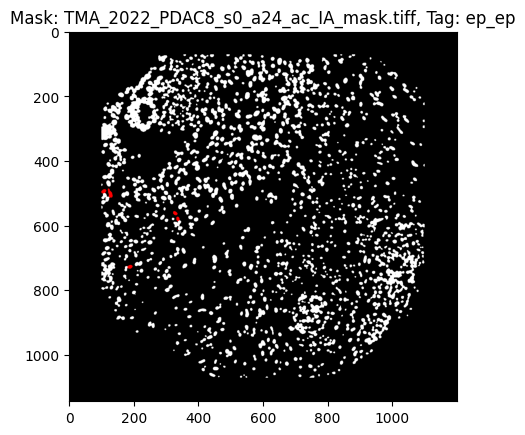

      cell_id_1  cell_id_2   distance
2419        490       2233  19.673737
2420        490       2238  18.626812
2421        490       2269  17.729876
2422        490       2327  10.251743
2423        490       2331   3.079409
3942        888       1545  17.447500
3943        888       1551  17.572300
3944        888       1614   7.053276
3945        888       1641  15.850173
                                          TiffName  \
12  2023_PDAC8_TMA_Immune_Noor_s0_a16_ac_full.tiff   

                                               Sample  \
12  PDAC8_Sector2Row6Column5_Punch4_Case209_ID_G_3...   

                       SampleName MCDFileName  
12  2023_PDAC8_TMA_Immune_Noor_16        MCD8  


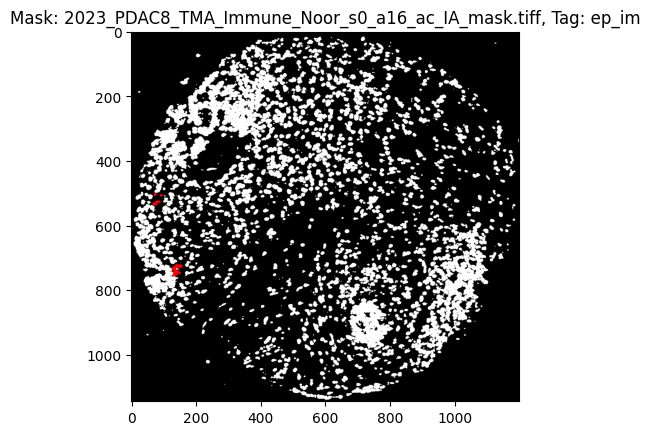

      cell_id_1  cell_id_2   distance
3330        490       1244  15.080223
3331        490       1267  19.277628
3332        490       1271   6.556130
3333        490       1272  17.844772
3334        490       1294  11.265653
3335        490       1333  12.442626
3336        490       1343  13.486636
4968        765       1798  17.820881
4969        765       1803  16.688558
4970        765       1823  11.572459
4971        765       1843   8.815042
4972        765       1889  10.327159
4973        765       1894  15.462421
5529        888       2113  12.186139
5530        888       2124  11.972788
5531        888       2126  19.219597
5532        888       2186  10.780038
5533        888       2199  18.650845
                      TiffName  \
267  PDAC8_s0_a79_ac_full.tiff   

                                                Sample SampleName MCDFileName  
267  PDAC8_Sector2Row6Column5_Punch4_Case209_ID_G_3...   PDAC8_79   PDAC8_CAF  


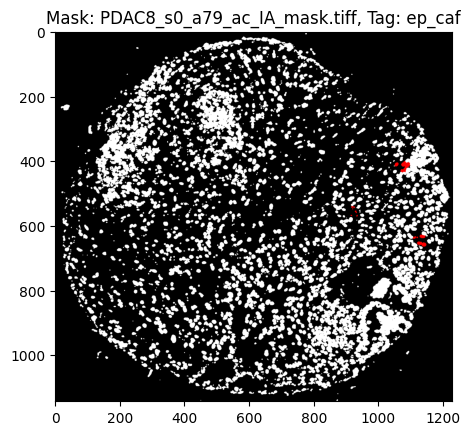

      cell_id_1  cell_id_2   distance
1400        765        771  16.227742
1401        765        798  17.350350
1615        888        915  19.735634
1616        888        916  14.251760
                                       TiffName  \
100  Ferris_TMA_2022_PDAC2_s0_a101_ac_full.tiff   

                                                Sample  \
100  PDAC2_Sector1Row4Column7_Punch1_Case133_ID_GSD...   

                    SampleName  
100  Ferris_TMA_2022_PDAC2_101  


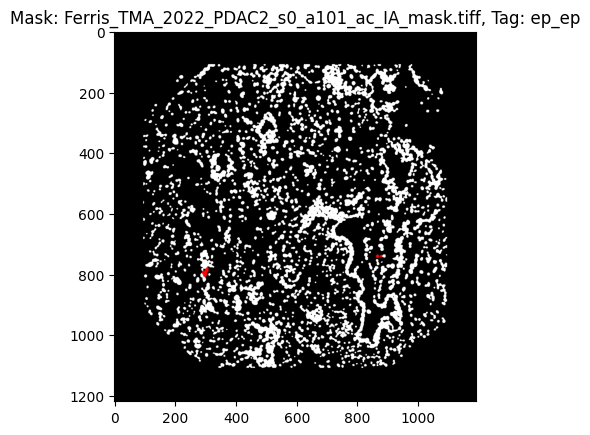

      cell_id_1  cell_id_2   distance
3450        490       4538  15.565716
3451        490       4551  18.518819
3452        490       4554  15.724751
3453        490       4592  16.052707
3454        490       4596   5.591370
3455        490       4662  18.740673
3456        490       4695  16.006718
3457        490       4717  18.554479
5124        765       4013  19.815308
5125        765       4041   8.570812
5849        888       3596   6.464478
5850        888       3639  11.921358
5851        888       3678   7.621093
5852        888       3736  20.056950
                                           TiffName  \
540  2023_PDAC2_TMA_Immune_Noor_s0_a45_ac_full.tiff   

                                                Sample  \
540  PDAC2_Sector1Row4Column7_Punch1_Case133_ID_GSD...   

                        SampleName MCDFileName  
540  2023_PDAC2_TMA_Immune_Noor_45        MCD2  


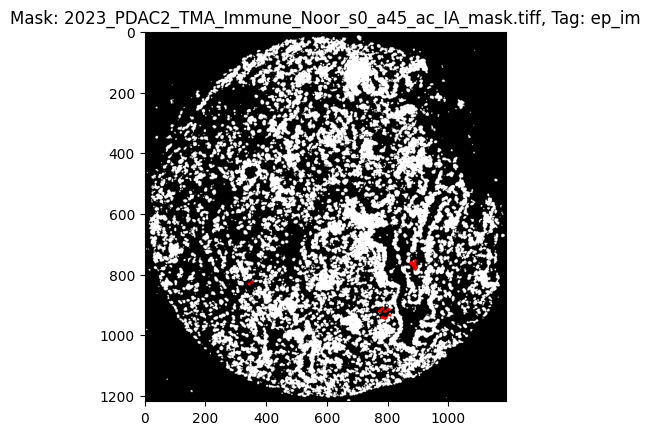

      cell_id_1  cell_id_2   distance
3922        490        917  19.240657
3923        490        932  15.051409
3924        490        938   8.296838
3925        490        960   9.979909
3926        490        962  12.579695
3927        490        979  19.520462
3928        490        999   6.720032
3929        490       1008  16.729188
5768        765       1640  19.320718
5769        765       1683  16.364562
5770        765       1714  19.805535
5771        765       1727  19.041935
5772        765       1739  11.405616
6597        888       1706  19.451677
6598        888       1744  11.295469
6599        888       1766  20.251187
6600        888       1790  12.800613
6601        888       1801   1.955248
6602        888       1862  19.259479
6603        888       1895  16.942260
                     TiffName  \
22  PDAC2_s0_a23_ac_full.tiff   

                                               Sample SampleName MCDFileName  
22  PDAC2_Sector1Row4Column7_Punch1_Case133_ID_GSD...   

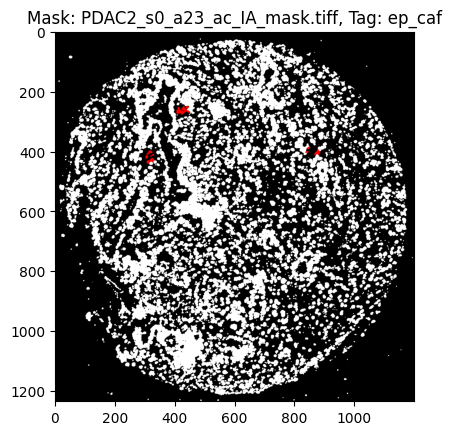

      cell_id_1  cell_id_2   distance
1417        490        493  17.265398
1418        490        494   9.255386
1419        490        496  12.827292
1420        490        499  17.016045
                                          TiffName  \
365  Ferris_TMA_2022_PDAC5_rev_s0_a28_ac_full.tiff   

                                                Sample  \
365  PDAC5_Sector1Row2Column7_Punch3_Case119_ID_GSD...   

                       SampleName  
365  Ferris_TMA_2022_PDAC5_rev_28  


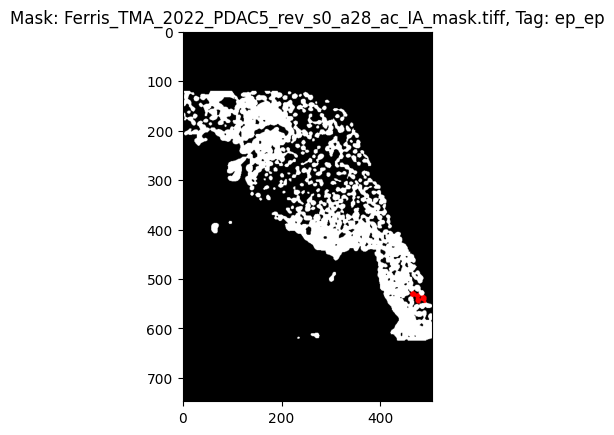

Empty DataFrame
Columns: [cell_id_1, cell_id_2, distance]
Index: []
                                           TiffName  \
265  2023_PDAC5_TMA_Immune_Noor_s0_a76_ac_full.tiff   

                                                Sample  \
265  PDAC5_Sector1Row2Column7_Punch3_Case119_ID_GSD...   

                        SampleName MCDFileName  
265  2023_PDAC5_TMA_Immune_Noor_76        MCD5  


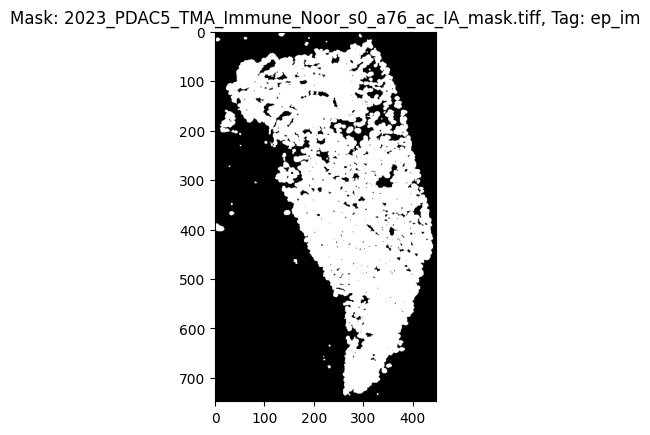

Empty DataFrame
Columns: [cell_id_1, cell_id_2, distance]
Index: []
                      TiffName  \
348  PDAC5_s0_a59_ac_full.tiff   

                                                Sample SampleName MCDFileName  
348  PDAC5_Sector1Row2Column7_Punch3_Case119_ID_GSD...   PDAC5_59   PDAC5_CAF  


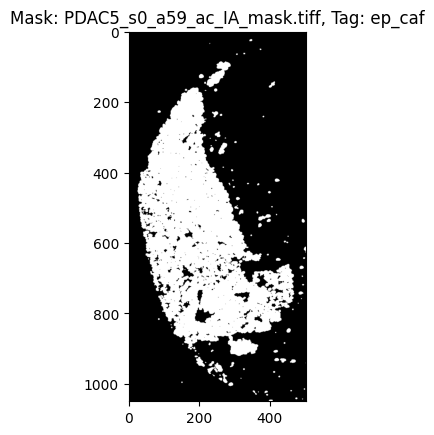

      cell_id_1  cell_id_2  distance
1344        888        915  8.217733
                               TiffName  \
275  TMA_2022_PDAC8_s0_a49_ac_full.tiff   

                                                Sample         SampleName  
275  PDAC8_Sector1Row7Column5_Punch3_Case212_ID_GSD...  TMA_2022_PDAC8_49  


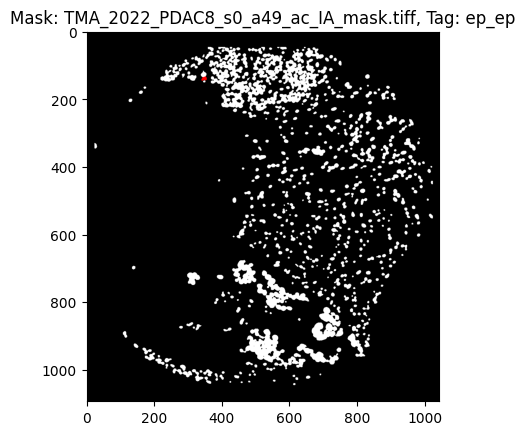

      cell_id_1  cell_id_2   distance
1933        490       1131  15.701270
2926        765        657  18.288398
4012        888        382  18.598995
4013        888        404  11.411865
4014        888        437  19.095660
                                          TiffName  \
16  2023_PDAC8_TMA_Immune_Noor_s0_a20_ac_full.tiff   

                                               Sample  \
16  PDAC8_Sector1Row7Column5_Punch3_Case212_ID_GSD...   

                       SampleName MCDFileName  
16  2023_PDAC8_TMA_Immune_Noor_20        MCD8  


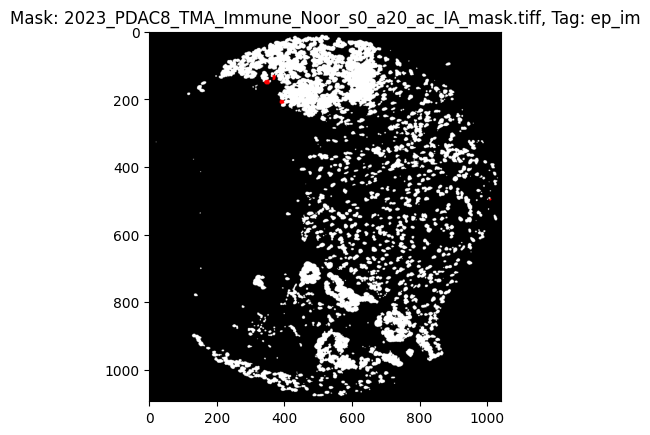

      cell_id_1  cell_id_2   distance
2546        490       1003   9.480984
2547        490       1025  19.372547
5024        888       1917  16.685709
5025        888       1934   9.662626
5026        888       1956  13.250535
5027        888       1961  19.817791
5028        888       1977  19.153079
                      TiffName  \
245  PDAC8_s0_a53_ac_full.tiff   

                                                Sample SampleName MCDFileName  
245  PDAC8_Sector1Row7Column5_Punch3_Case212_ID_GSD...   PDAC8_53   PDAC8_CAF  


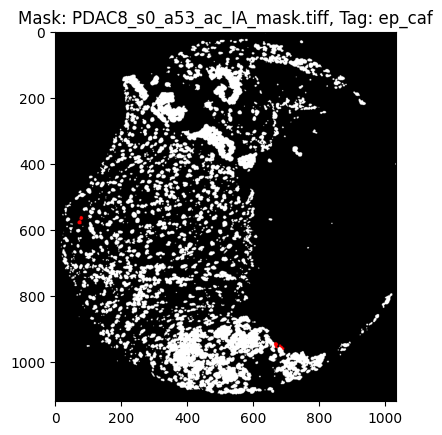

       cell_id_1  cell_id_2   distance
1158         490        516  20.330933
1159         490        530  15.058203
1883         765        769  15.073293
1884         765        778  17.552027
2208         888        897  13.678433
2209         888        915  13.274109
2210         888        934  12.353635
2211         888        972  19.554616
7723        2862       2921  14.916427
11174       4096       4105  10.395531
11175       4096       4106  19.826816
11176       4096       4114  11.939749
11177       4096       4145  16.022319
                                   TiffName  \
199  TMA_2022_PDAC7_rev_s0_a97_ac_full.tiff   

                                                Sample             SampleName  
199  PDAC7_Sector1Row4Column3_Punch1_Case196_ID_1_8...  TMA_2022_PDAC7_rev_97  


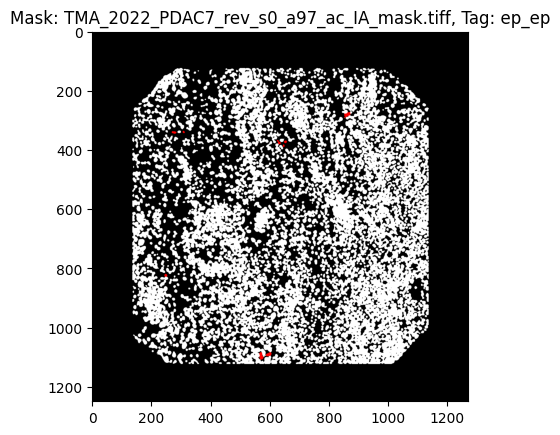

       cell_id_1  cell_id_2   distance
4850         490       1274  17.892827
4851         490       1314  12.575708
4852         490       1324  19.560938
4853         490       1371  18.631785
4854         490       1401  11.982392
4855         490       1435   5.982444
4856         490       1463  18.432207
4857         490       1498   9.765945
4858         490       1504  15.733381
4859         490       1515  12.832382
4860         490       1517  19.596071
4861         490       1561  17.433530
7945         765       2056  10.343545
7946         765       2099   6.714457
7947         765       2169  12.641455
9334         888       2141  19.846098
9335         888       2222  13.840267
9336         888       2223  15.073138
9337         888       2273  11.913456
9338         888       2305   4.742314
9339         888       2311  19.488931
9340         888       2312  16.452235
9341         888       2356   6.798205
9342         888       2371   3.889588
9343         888       24

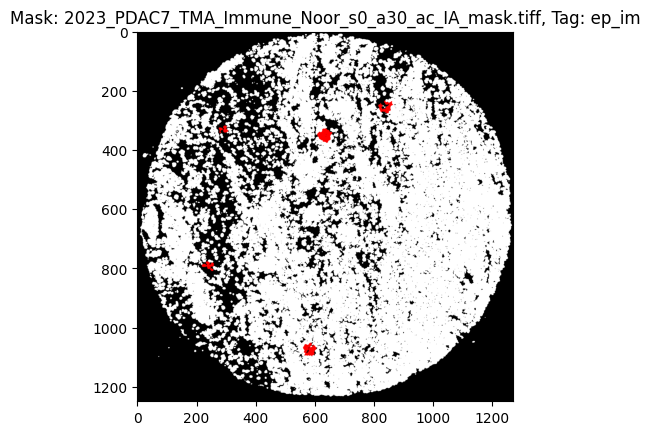

       cell_id_1  cell_id_2   distance
5454         490       1251  15.171371
5455         490       1279  17.161340
5456         490       1293  13.579157
5457         490       1309   7.506003
5458         490       1361   1.772766
5459         490       1378   9.967342
5460         490       1400  17.430260
5461         490       1410  17.260042
5462         490       1414   8.823719
5463         490       1472  14.627959
5464         490       1486  15.075009
5465         490       1520  17.190821
8796         765       2031  14.421836
8797         765       2128   6.802821
8798         765       2149   5.205452
8799         765       2202  17.628624
8800         765       2206   9.076416
8801         765       2275  10.982080
8802         765       2293  18.274522
8803         765       2303  17.691406
10305        888       2150  18.471347
10306        888       2161  15.050291
10307        888       2193  12.347749
10308        888       2216  14.197723
10309        888       22

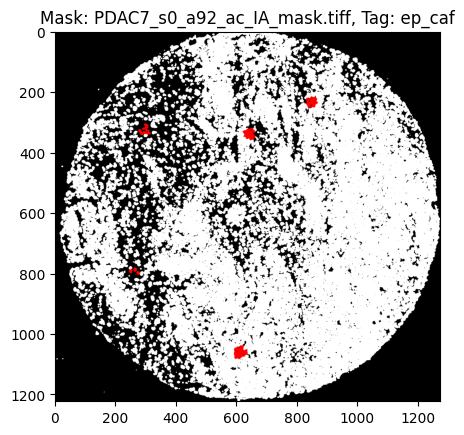

       cell_id_1  cell_id_2   distance
1852         490        495  18.563908
1853         490        504  10.582113
1854         490        539  18.902041
1855         490        549  13.232278
1856         490        576  19.570920
2836         765        766  16.113196
2837         765        799  14.669790
2838         765        816   9.451798
2839         765        843  15.298225
2840         765        864  19.921647
3276         888        901  13.073759
3277         888        931  11.026961
3278         888        949  19.238175
3279         888        965  19.523005
9758        2862       2867  14.649336
9759        2862       2909   9.432602
13624       4096       4118  11.276577
                                   TiffName  \
737  TMA_2022_PDAC4_rev_s0_a41_ac_full.tiff   

                                                Sample             SampleName  
737  PDAC4_Sector2Row3Column8_Punch3_Case50_ID_1_76997  TMA_2022_PDAC4_rev_41  


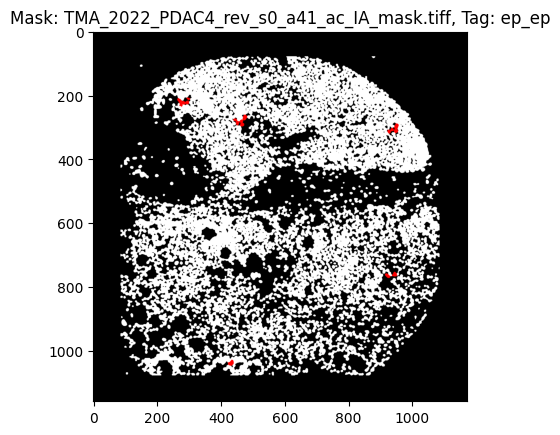

       cell_id_1  cell_id_2   distance
7348         490        856  15.195970
7349         490        863  20.950938
7350         490        899  14.201300
7351         490        920  12.870692
7352         490        953  14.557378
...          ...        ...        ...
51878       4096       8747   9.804708
51879       4096       8770  14.957159
51880       4096       8785  17.916762
51881       4096       8821  16.401507
51882       4096       8840  16.271615

[69 rows x 3 columns]
                                           TiffName  \
129  2023_PDAC4_TMA_Immune_Noor_s0_a46_ac_full.tiff   

                                                Sample  \
129  PDAC4_Sector2Row3Column8_Punch3_Case50_ID_1_76997   

                        SampleName MCDFileName  
129  2023_PDAC4_TMA_Immune_Noor_46        MCD7  


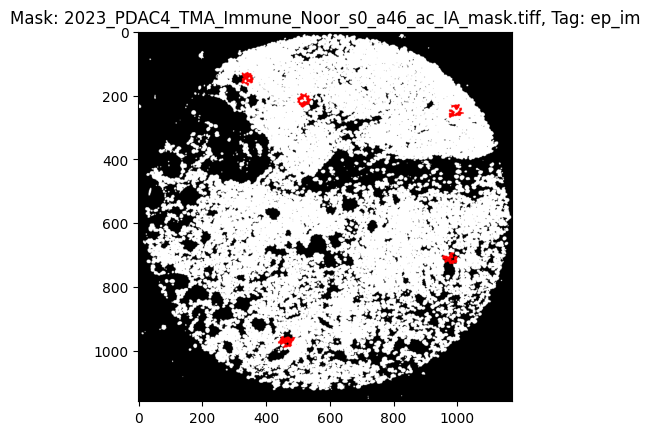

       cell_id_1  cell_id_2   distance
8203         490        922  19.483694
8204         490        969  12.513844
8205         490        984  13.221586
8206         490        985  18.962755
8207         490       1031   6.226409
...          ...        ...        ...
59017       4096       8568   8.214618
59018       4096       8600  15.429790
59019       4096       8616  10.934271
59020       4096       8631  17.516452
59021       4096       8640  20.870523

[76 rows x 3 columns]
                      TiffName  \
650  PDAC4_s0_a46_ac_full.tiff   

                                                Sample SampleName MCDFileName  
650  PDAC4_Sector2Row3Column8_Punch3_Case50_ID_1_76997   PDAC4_46   PDAC4_CAF  


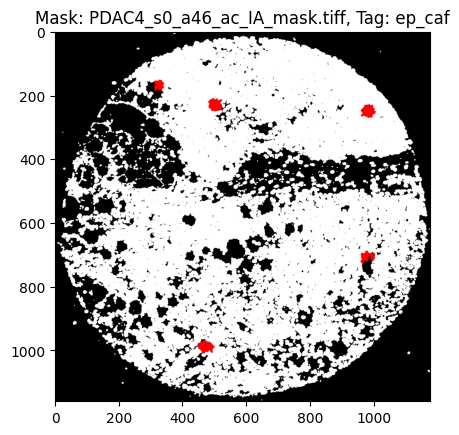

       cell_id_1  cell_id_2   distance
1555         490        491  13.316152
1556         490        554  20.275836
2376         765        803  16.850879
2377         765        814  14.775640
2378         765        839  20.739345
2721         888        894  18.131819
2722         888        924  11.298897
2723         888        934  20.747957
8803        2862       2868  14.792285
8804        2862       2911  14.543257
8805        2862       2932  13.824644
12770       4096       4129  15.514499
12771       4096       4136  12.095126
12772       4096       4140  20.202745
                                   TiffName  \
763  TMA_2022_PDAC4_rev_s0_a67_ac_full.tiff   

                                                Sample             SampleName  
763  PDAC4_Sector4Row3Column6_Punch3_Case110_ID_GSD...  TMA_2022_PDAC4_rev_67  


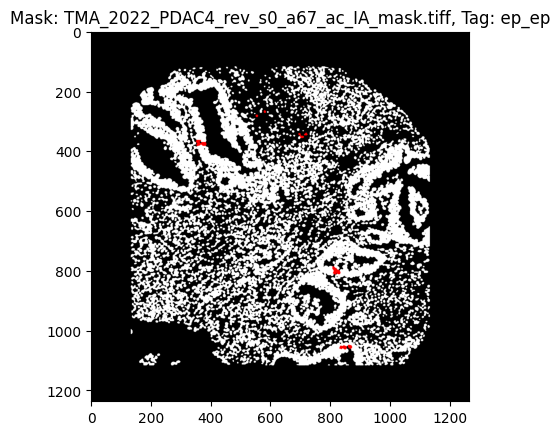

       cell_id_1  cell_id_2   distance
6734         490       1172  18.964270
6735         490       1195  13.771305
6736         490       1251  13.922352
6737         490       1268   5.100464
6738         490       1279  13.236900
6739         490       1299  18.408628
6740         490       1305  18.020724
6741         490       1343   8.202093
6742         490       1354  10.010476
6743         490       1434  16.348141
6744         490       1447  16.152074
6745         490       1479  18.169662
10267        765       1947   2.614048
10268        765       2004   8.640253
10269        765       2074  13.913925
10270        765       2124  20.804004
11749        888       2058  19.577624
11750        888       2101  19.913643
11751        888       2129  11.270744
11752        888       2147  10.834815
11753        888       2159  16.726464
11754        888       2204  19.985979
11755        888       2224   7.567034
11756        888       2240   5.349360
11757        888       22

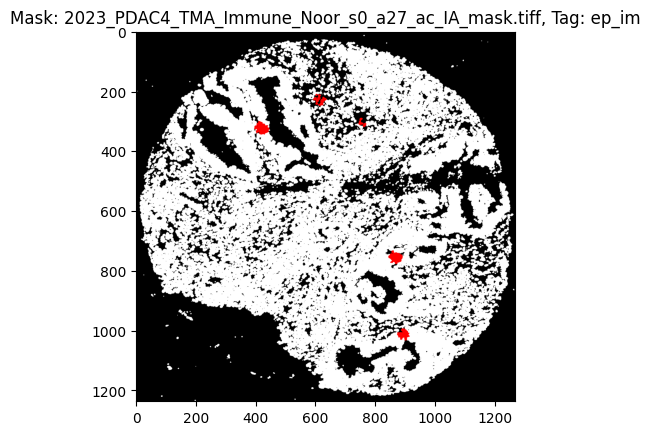

       cell_id_1  cell_id_2   distance
6954         490       1177  17.237839
6955         490       1223  16.370177
6956         490       1241   8.541765
6957         490       1273  12.373214
6958         490       1297   2.918282
6959         490       1313  10.577911
6960         490       1410  14.734979
6961         490       1411  16.073150
10599        765       1767  16.477367
10600        765       1797  19.986136
10601        765       1845  13.649649
10602        765       1873  18.292257
10603        765       1901   7.694323
10604        765       1927  18.928807
10605        765       1939  11.202218
10606        765       1946  13.359809
10607        765       1956  19.869946
10608        765       1993  20.002575
10609        765       2005  19.313928
12203        888       2126  12.558209
12204        888       2156  13.910640
12205        888       2184   6.853141
12206        888       2217  14.974248
12207        888       2235   3.853415
12208        888       22

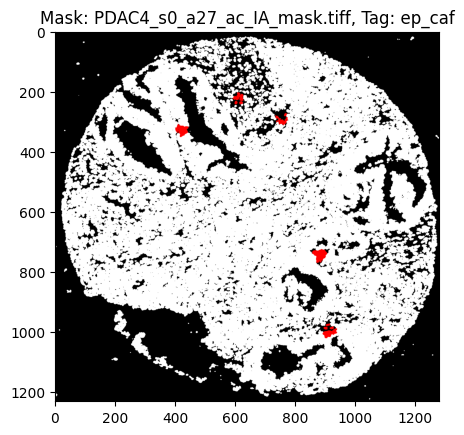

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Paths to relevant folders
distance_folder = "distances_2"
epithelial_mask_folder = "000_Data/cell_segmentation_masks/epithelial_padded"
immune_mask_folder = "000_Data/cell_segmentation_masks/new_immune"
caf_mask_folder = "000_Data/cell_segmentation_masks/CAF"

# Sample mappings
#ep_sample_mapping = pd.read_csv("path_to_ep_sample_mapping.csv")
#im_sample_mapping = pd.read_csv("path_to_im_sample_mapping.csv")
#caf_sample_mapping = pd.read_csv("path_to_caf_sample_mapping.csv")

cell_ids_of_interest = [490, 888, 765, 4096, 2862]
tags = ['ep_ep', 'im_im', 'caf_caf', 'ep_im', 'ep_caf', 'im_caf']

# Iterate over the first 5 files in file_list
for file_name in file_list[1:8]:
    for tag in tags:
        csv_file_path = os.path.join(distance_folder, f"{file_name}_{tag}_distances.csv")
        if os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)

            # Filter based on tag and cell_ids_of_interest
            if tag.startswith('ep'):
                filtered_df = df[df['cell_id_1'].isin(cell_ids_of_interest)]
                print(filtered_df)
                # Load corresponding mask
                if tag.endswith('caf'):
                    mask_folder = caf_mask_folder
                    sample_mapping = caf_sample_mapping
                elif tag.endswith('im'):
                    mask_folder = immune_mask_folder
                    sample_mapping = im_sample_mapping
                elif tag.endswith('ep'):
                    mask_folder = epithelial_mask_folder
                    sample_mapping = ep_sample_mapping

                # Get the relevant mask file
                sample_row = sample_mapping[sample_mapping['Sample'] + '.csv' == file_name]
                print(sample_row)
                mask_name = sample_row['TiffName'].str.replace('full.tiff', 'IA_mask.tiff').values[0]
                mask_path = os.path.join(mask_folder, mask_name)
                mask = plt.imread(mask_path)

                # Plot the mask with relevant cells highlighted
                #plt.figure(figsize=(10, 10))
                #plt.imshow(mask, cmap='gray')
                
                # Highlight cells in cell_id_2 column of the filtered DataFrame
                #mask_colored = np.ones_like(mask) * 255
                # Create a new RGB image for visualization
                mask_colored = np.zeros((*mask.shape, 3), dtype=np.uint8)  # Initialize as black (background)

                    # Set all non-matching cells to white
                mask_colored[mask > 0] = [255, 255, 255]  # Set all cells to white
                

                # Highlight the specific cells in red
                for cell_id in filtered_df['cell_id_2'].unique():
                    mask_colored[mask == cell_id] = [255, 0, 0]
                    
                mask_colored[mask == 2] = [0, 0, 0] #set the border of 2 to black
                #for cell_id in filtered_df['cell_id_2'].unique():
                #    mask_colored = np.copy(mask)
                #    mask_colored[mask == cell_id] = 255  # Set the color for the cells of interest
                #    plt.imshow(mask_colored, alpha=0.6)  # Overlay the cells onto the original mask
                
                plt.imshow(mask_colored)
                plt.title(f"Mask: {mask_name}, Tag: {tag}")
                #plt.axis('off')  # Hide axes for a cleaner look
                plt.show()
        

for every file in the distances folder, for each file_names in the first 5 files in file_list, read in all the csvs that match {file_name}_{tag}_distances.csv, where 'tag' can be ep_ep, im_im, caf_caf, ep_im, ep_caf, or im_caf. 

Select cell numbers 78, and 263, and 490. Select dataframes where the first half of 'tag' is 'ep', and filter to just the rows where cell_id_1 is == 78, 263, or 490. 

Then load the relevant masks, that are in the folders 000_Data/cell_segmentation_masks/epithelial, 000_Data/cell_segmentation_masks/new_immune, and 000_Data/cell_segmentation_masks/CAF. The way we will figure out which one to load in, is by ep_sample_mapping, where ep_sample_mapping['Sample'], without .csv, will match the filename under consideration, and the corresponding ep_sample_mapping['TiffName'], replacing full.tiff with IA_mask.tiff, will match the mask name in 000_Data/cell_segmentation_masks/epithelial. Similarly, im_sample_mapping can be used to pull from 000_Data/cell_segmentation_masks/new_immune, and caf_sample_mapping can be used to pull from 000_Data/cell_segmentation_masks/CAF.

Take the ep dataframe where the second half of the tag is "caf", and plot the caf segmentation mask, with cells that correspond to the numbers remaining in cell_id_2 coloured. Then do the same for second half of tag being "im" and "ep".

# Check significance of neighbour associations

1. First, read in pairs, and attach the relevant annotations. 
1. Filter to only pairs where both cells are annotated.
2. Second, calculation correlations between all categories (like Noor did!) and output a heatmap.
3. Third, count the number of each type of pair, and then randomly permute pairs WITHIN EACH IMAGE, and determine if there are significantly more of certain pairs than you'd expect (to look at grouping within images)
4. Third, count the number of each type of pair, and then randomly permute pairs WITHIN EACH PATIENT
5. Third, count the number of each type of pair, and then randomly permute pairs WITHIN WHOLE DATASET

#I have to set up for this- immune doesn't have a merged_label, and caf and ep as they've been saved don't have any labels

In [240]:
#read in annotation_dataframes
im_anno_dat = pd.read_csv("000_Data/adata_PDAC_lymphoid_and_myeloid_annotations_AUG2024_with_descr_and_overlay_labels.csv")
caf_anno_dat = pd.read_csv("000_Data/adata_PDAC_caf_clusters_k15_with_labels_and_endothelial_labels_AUG27.csv")
ep_anno_dat = pd.read_csv("000_Data/all_by_panCK_clustered_no6_nostroma_with_ductinfo_SIMPLIFIEDumbrellagroupings_cooccureence_groups_domtoo_het_ranking_OVERLAY_OBJECTS.csv", low_memory = False)

In [143]:
im_anno_dat['Merged_Immune_Labels'] = im_anno_dat.apply(
    lambda row: row['Lymphoid_Labels'] if row['Lymphoid_Labels'] != 'Others' else row['Myeloid_Labels'],
    axis=1
)

im_anno_dat = im_anno_dat[['description', 'cell_id', 'Merged_Immune_Labels']]

im_anno_dat = im_anno_dat[~im_anno_dat['Merged_Immune_Labels'].isin(["Others", "Undefined"])]

for desc in im_anno_dat['description'].unique():
    # Subset the DataFrame for the current description
    subset_df = im_anno_dat[im_anno_dat['description'] == desc]
    # Define the output CSV file path using the description as the filename
    output_path = os.path.join("000_Data/single_cell_annotations/immune", f"{desc}.csv")
    # Save the subset DataFrame as a CSV
    subset_df.to_csv(output_path, index=False)
    print(f"Saved {output_path}")

Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector3Row2Column1_Punch1_Case64_ID_1_93724.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector3Row3Column1_Punch1_Case72_ID_G_11291.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector3Row1Column1_Punch1_Case56_ID_1_90015.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row3Column1_Punch1_Case9_ID_1_3430.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row4Column1_Punch1_Case17_ID_1_43125.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row2Column1_Punch1_Case1_ID_1_100070.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector2Row2Column7_Punch1_Case39_ID_1_69943.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row3Column7_Punch1_Case15_ID_1_41902.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector4Row3Column2_Punch1_Case104_ID_G_8978.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row4Column3_Punch1_Case19_ID_1_45196.csv
Sa

Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector3Row3Column5_Punch1_Case76_ID_G_13634.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row2Column7_Punch1_Case7_ID_1_109753.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row3Column8_Punch1_Case16_ID_1_42221.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector2Row2Column6_Punch1_Case38_ID_1_69785.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector2Row2Column8_Punch1_Case40_ID_1_70237.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector2Row1Column7_Punch1_Case31_ID_1_57450.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector3Row1Column7_Punch1_Case62_ID_1_93395.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row4Column5_Punch1_Case21_ID_1_4568.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector1Row4Column8_Punch1_Case24_ID_1_48081.csv
Saved 000_Data/single_cell_annotations/immune/PDAC1_Sector2Row1Column3_Punch1_Case27_ID_1_5121.csv
Sa

Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector2Row1Column5_Punch1_Case139_ID_GSDM_2333.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector4Row1Column3_Punch2_Case34_ID_1_67299.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector3Row1Column4_Punch2_Case3_ID_1_103356.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector4Row3Column4_Punch2_Case51_ID_1_85268.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector4Row2Column1_Punch2_Case40_ID_1_70237.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector1Row3Column5_Punch1_Case123_ID_GSDM_1747.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector3Row4Column5_Punch2_Case28_ID_1_52582.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector3Row1Column6_Punch2_Case5_ID_1_104192.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector4Row1Column4_Punch2_Case35_ID_1_67731.csv
Saved 000_Data/single_cell_annotations/immune/PDAC2_Sector2Row3Column4_Punch1_Case154_ID_GSDM_

Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector1Row2Column4_Punch2_Case58_ID_1_91691.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector1Row3Column8_Punch2_Case71_ID_G_10196.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector4Row3Column1_Punch2_Case159_ID_GSDM_862.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector2Row1Column7_Punch2_Case86_ID_G_25536.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector3Row3Column2_Punch2_Case128_ID_GSDM_1894.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector3Row3Column3_Punch2_Case129_ID_GSDM_1949.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector1Row3Column7_Punch2_Case70_ID_1_99593.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector3Row2Column7_Punch2_Case125_ID_GSDM_1812.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector1Row2Column2_Punch2_Case57_ID_1_91050.csv
Saved 000_Data/single_cell_annotations/immune/PDAC3_Sector1Row4Column7_Punch2_Case78_ID_G

Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector2Row1Column8_Punch3_Case34_ID_1_67299.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector4Row2Column7_Punch3_Case103_ID_G_8289.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector2Row4Column8_Punch3_Case57_ID_1_91050.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector3Row2Column6_Punch3_Case71_ID_G_10196.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector1Row2Column5_Punch3_Case7_ID_1_109753.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector4Row2Column3_Punch3_Case100_ID_G_6686.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector3Row3Column4_Punch3_Case77_ID_G_14553.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector3Row2Column4_Punch3_Case70_ID_1_99593.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector3Row3Column1_Punch3_Case74_ID_G_11920.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector1Row2Column4_Punch3_Case6_ID_1_106476.csv


Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector2Row3Column2_Punch3_Case44_ID_1_70971.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector3Row2Column2_Punch3_Case68_ID_1_96217.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector1Row4Column4_Punch3_Case22_ID_1_4623.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector2Row4Column3_Punch3_Case52_ID_1_85532.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector3Row1Column8_Punch3_Case65_ID_1_94889.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector4Row1Column2_Punch3_Case91_ID_G_26810.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector2Row2Column1_Punch3_Case35_ID_1_67731.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector1Row3Column1_Punch3_Case11_ID_1_3583.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector2Row3Column5_Punch3_Case47_ID_1_72749.csv
Saved 000_Data/single_cell_annotations/immune/PDAC4_Sector1Row3Column6_Punch3_Case16_ID_1_42221.csv
Sa

Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector2Row3Column6_Punch3_Case158_ID_GSDM_850.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector4Row3Column4_Punch4_Case52_ID_1_85532.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector3Row2Column4_Punch4_Case13_ID_1_40185.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector2Row4Column3_Punch3_Case163_ID_GSDM_962.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector3Row3Column2_Punch4_Case19_ID_1_45196.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector1Row3Column2_Punch3_Case122_ID_GSDM_1619.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector2Row2Column2_Punch3_Case146_ID_GSDM_2546.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector3Row2Column2_Punch4_Case11_ID_1_3583.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector3Row3Column7_Punch4_Case24_ID_1_48081.csv
Saved 000_Data/single_cell_annotations/immune/PDAC5_Sector4Row3Column7_Punch4_Case55_ID_1_8

Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector4Row2Column1_Punch4_Case152_ID_GSDM_283.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector2Row1Column1_Punch4_Case81_ID_G_22428.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector3Row4Column1_Punch4_Case136_ID_GSDM_2185.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector3Row2Column4_Punch4_Case123_ID_GSDM_1747.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector2Row3Column8_Punch4_Case103_ID_G_8289.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector1Row4Column1_Punch4_Case73_ID_G_11310.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector4Row3Column4_Punch4_Case163_ID_GSDM_962.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector2Row1Column3_Punch4_Case83_ID_G_25407.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector1Row2Column7_Punch4_Case63_ID_1_93605.csv
Saved 000_Data/single_cell_annotations/immune/PDAC6_Sector1Row2Column3_Punch4_Case59_ID_1_

Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row5Column9_Punch1_Case212_ID_GSDM_1069.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row3Column9_Punch1_Case192_ID_1_77965.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row6Column5_Punch1_Case218_ID_GSDM_1900.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector2Row2Column4_Punch2_Case198_ID_1_89590.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector2Row1Column3_Punch2_Case191_ID_1_77495.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row4Column3_Punch1_Case196_ID_1_87631.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row1Column10_Punch1_Case173_ID_1_44785.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row7Column4_Punch1_Case227_ID_GSDM_2651.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row6Column2_Punch1_Case215_ID_GSDM_1346.csv
Saved 000_Data/single_cell_annotations/immune/PDAC7_Sector1Row6Column8_Punch1_Case

Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector2Row3Column5_Punch4_Case179_ID_1_49607.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector2Row3Column8_Punch4_Case182_ID_1_67113.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector1Row3Column4_Punch3_Case186_ID_1_68868.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_48081.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector2Row1Column9_Punch3_Case228_ID_GSDM_2748.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector2Row7Column5_Punch4_Case219_ID_GSDM_1920.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector1Row4Column5_Punch3_Case194_ID_1_85948.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_85948.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector1Row3Column5_Punch3_Case187_ID_1_72137.csv
Saved 000_Data/single_cell_annotations/immune/PDAC8_Sector1Row1Column5_Punch3_Case176_

In [144]:
#cut annotation dataframes into distinct csvs, with only necessary rows kept
#single_cell_annotations

#load sample_csvs that I want to pull descriptions from
#add a 'description' column
CAF_input_folder = "CAF_data/Sample_csvs"
# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(CAF_input_folder) if f.endswith('.csv')]
# Initialize an empty list to hold the DataFrames
dataframes = []
# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(CAF_input_folder, csv_file)
    df = pd.read_csv(file_path)  # Read the CSV into a DataFrame
    dataframes.append(df)       # Append to the list of DataFrames
# Concatenate all the DataFrames into one
sample_CAF_df = pd.concat(dataframes, ignore_index=True)
#add a description column
# Create a mapping from 'SampleName' to 'Sample'
sample_mapping = sample_CAF_df.set_index('SampleName')['Sample'].to_dict()

# Add 'description' column to caf_df_mov
caf_anno_dat['description'] = caf_anno_dat['sample'].map(sample_mapping)

caf_anno_dat['Merged_CAF_Endo_Labels'] = caf_anno_dat.apply(
    lambda row: row['CAF_Labels'] if row['CAF_Labels'] != 'Others' else row['Endo_Labels'],
    axis=1
)

caf_anno_dat = caf_anno_dat[~caf_anno_dat['Merged_CAF_Endo_Labels'].isin(["Others", "Undefined"])]


caf_anno_dat = caf_anno_dat[['description', 'cell_id', 'Merged_CAF_Endo_Labels']]


for desc in caf_anno_dat['description'].unique():
    # Subset the DataFrame for the current description
    subset_df = caf_anno_dat[caf_anno_dat['description'] == desc]
    
    # Define the output CSV file path using the description as the filename
    output_path = os.path.join("000_Data/single_cell_annotations/caf", f"{desc}.csv")
    
    # Save the subset DataFrame as a CSV
    subset_df.to_csv(output_path, index=False)

    print(f"Saved {output_path}")

Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector1Row2Column3_Punch1_Case3_ID_1_103356.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector4Row1Column1_Punch1_Case88_ID_G_26345.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector2Row1Column6_Punch1_Case30_ID_1_56588.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector4Row1Column3_Punch1_Case90_ID_G_26691.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector4Row2Column1_Punch1_Case96_ID_G_32052.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector1Row3Column5_Punch1_Case13_ID_1_40185.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector3Row3Column5_Punch1_Case76_ID_G_13634.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector4Row2Column2_Punch1_Case97_ID_G_32657.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector3Row3Column2_Punch1_Case73_ID_G_11310.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector2Row1Column3_Punch1_Case27_ID_1_5121.csv
Saved 000_Data/single_cell_anno

Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector3Row1Column8_Punch1_Case63_ID_1_93605.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector3Row1Column2_Punch1_Case57_ID_1_91050.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector3Row3Column6_Punch1_Case77_ID_G_14553.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector1Row4Column4_Punch1_Case20_ID_1_4567.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector2Row3Column6_Punch1_Case46_ID_1_71998.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector1Row2Column7_Punch1_Case7_ID_1_109753.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector3Row4Column5_Punch1_Case84_ID_G_25487.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector4Row2Column5_Punch1_Case100_ID_G_6686.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector3Row4Column3_Punch1_Case82_ID_G_23381.csv
Saved 000_Data/single_cell_annotations/caf/PDAC1_Sector2Row1Column1_Punch1_Case25_ID_1_48194.csv
Saved 000_Data/single_cell_anno

Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector3Row4Column7_Punch2_Case30_ID_1_56588.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector2Row3Column6_Punch1_Case156_ID_GSDM_583.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector3Row3Column8_Punch2_Case23_ID_1_4752.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector2Row1Column3_Punch1_Case137_ID_GSDM_2221.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector2Row1Column1_Punch1_Case135_ID_GSDM_2152.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector2Row4Column2_Punch1_Case160_ID_GSDM_920.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector2Row4Column5_Punch1_Case163_ID_GSDM_962.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector4Row3Column5_Punch2_Case52_ID_1_85532.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector3Row2Column2_Punch2_Case9_ID_1_3430.csv
Saved 000_Data/single_cell_annotations/caf/PDAC2_Sector3Row2Column5_Punch2_Case12_ID_1_3924.csv
Saved 000_Data/single_

Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector4Row2Column2_Punch2_Case152_ID_GSDM_283.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector1Row3Column5_Punch2_Case68_ID_1_96217.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector3Row2Column8_Punch2_Case126_ID_GSDM_1844.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector3Row1Column7_Punch2_Case117_ID_GSDM_1470.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector2Row4Column3_Punch2_Case105_ID_G_9208.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector2Row3Column8_Punch2_Case102_ID_G_8288.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector4Row1Column4_Punch2_Case146_ID_GSDM_2546.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector3Row3Column1_Punch2_Case127_ID_GSDM_1885.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector2Row1Column4_Punch2_Case83_ID_G_25407.csv
Saved 000_Data/single_cell_annotations/caf/PDAC3_Sector2Row2Column8_Punch2_Case95_ID_G_31568.csv
Saved 000_Data/s

Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector2Row3Column1_Punch3_Case43_ID_1_70640.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector1Row3Column8_Punch3_Case18_ID_1_44422.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector3Row3Column6_Punch3_Case79_ID_G_17185.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector3Row4Column7_Punch3_Case88_ID_G_26345.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector3Row1Column4_Punch3_Case61_ID_1_92541.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector3Row1Column1_Punch3_Case58_ID_1_91691.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector1Row2Column3_Punch3_Case5_ID_1_104192.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector4Row3Column1_Punch3_Case105_ID_G_9208.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector3Row3Column3_Punch3_Case76_ID_G_13634.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector3Row4Column1_Punch3_Case82_ID_G_23381.csv
Saved 000_Data/single_cell_ann

Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector1Row2Column2_Punch3_Case4_ID_1_104134.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector4Row1Column1_Punch3_Case90_ID_G_26691.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector2Row2Column7_Punch3_Case41_ID_1_70327.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector2Row2Column6_Punch3_Case40_ID_1_70237.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector4Row3Column2_Punch3_Case106_ID_G_9725.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector1Row4Column8_Punch3_Case26_ID_1_5102.csv
Saved 000_Data/single_cell_annotations/caf/PDAC4_Sector2Row1Column2_Punch3_Case28_ID_1_52582.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector3Row2Column7_Punch4_Case16_ID_1_42221.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector3Row3Column3_Punch4_Case20_ID_1_4567.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector3Row4Column8_Punch4_Case33_ID_1_67113.csv
Saved 000_Data/single_cell_annot

Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector3Row3Column5_Punch4_Case22_ID_1_4623.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector4Row2Column8_Punch4_Case49_ID_1_76312.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector2Row2Column2_Punch3_Case146_ID_GSDM_2546.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector2Row3Column1_Punch3_Case153_ID_GSDM_347.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector3Row4Column4_Punch4_Case29_ID_1_54342.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector2Row3Column8_Punch3_Case160_ID_GSDM_920.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector3Row2Column3_Punch4_Case12_ID_1_3924.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector4Row3Column8_Punch4_Case56_ID_1_90015.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector3Row4Column5_Punch4_Case30_ID_1_56588.csv
Saved 000_Data/single_cell_annotations/caf/PDAC5_Sector4Row1Column7_Punch4_Case40_ID_1_70237.csv
Saved 000_Data/single_cel

Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector2Row1Column6_Punch4_Case86_ID_G_25536.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector1Row3Column3_Punch4_Case67_ID_1_96213.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector3Row2Column8_Punch4_Case127_ID_GSDM_1885.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector3Row2Column5_Punch4_Case124_ID_GSDM_1774.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector3Row4Column5_Punch4_Case140_ID_GSDM_2417.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector1Row3Column1_Punch4_Case65_ID_1_94889.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector3Row4Column6_Punch4_Case141_ID_GSDM_2487.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector1Row3Column4_Punch4_Case68_ID_1_96217.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector3Row3Column8_Punch4_Case135_ID_GSDM_2152.csv
Saved 000_Data/single_cell_annotations/caf/PDAC6_Sector3Row4Column3_Punch4_Case138_ID_GSDM_2310.csv
Saved 000_Da

Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector1Row2Column3_Punch1_Case176_ID_1_47625.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector2Row2Column3_Punch2_Case197_ID_1_87784.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector1Row4Column2_Punch1_Case195_ID_1_86289.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector1Row3Column6_Punch1_Case189_ID_1_77191.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector1Row4Column9_Punch1_Case202_ID_1_95427.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector1Row8Column4_Punch2_Case172_ID_1_4467.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector1Row7Column3_Punch1_Case226_ID_GSDM_2547.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector1Row6Column3_Punch1_Case216_ID_GSDM_1472.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector2Row4Column2_Punch2_Case208_ID_G_26819.csv
Saved 000_Data/single_cell_annotations/caf/PDAC7_Sector2Row5Column3_Punch2_Case215_ID_GSDM_1346.csv
Saved 000_Data/

Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector1Row8Column5_Punch3_Case218_ID_GSDM_1900.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector2Row3Column10_Punch4_Case184_ID_1_68539.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector1Row7Column5_Punch3_Case212_ID_GSDM_1069.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector2Row3Column4_Punch4_Case178_ID_1_49506.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector1Row5Column5_Punch3_Case200_ID_1_92732.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector2Row6Column1_Punch4_Case205_ID_1_99178.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector1Row4Column3_Punch3_Case192_ID_1_77965.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector2Row7Column2_Punch4_Case216_ID_GSDM_1472.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector2Row3Column5_Punch4_Case179_ID_1_49607.csv
Saved 000_Data/single_cell_annotations/caf/PDAC8_Sector2Row6Column4_Punch4_Case208_ID_G_26819.csv
Saved 000_Dat

In [245]:
print(ep_anno_dat.columns)

Index(['Unnamed: 0', 'X', 'PRSS1', 'ECAD', 'panCK', 'S100A9', 'TP63', 'VIM',
       'CEACAM6', 'KRT5', 'KRT14', 'KRT19', 'KRT20', 'CLDN3', 'AGR2', 'TFF1',
       'GATA6', 'KRT81', 'CLU', 'SPP1', 'VCAM1', 'TNFRSF11B', 'S100A2', 'INS',
       'S100P', 'BMP4', 'FAP', 'MUC16', 'PDX1', 'CASP3', 'MMP7', 'CAIX',
       'TSPAN8', 'MKI67', 'CAV1', 'CD31', 'REG4', 'ANXA2', 'FOXA2', 'CD45',
       'PDPN', 'S100A4', 'SMA', 'sample', 'CellNb', 'x_slide', 'y_slide',
       'description', 'area', 'DNA1', 'DNA2', 'Slide', 'k30_clusters',
       'CaseID', 'ImageNb', 'renamed_clusters', 'count', 'local_id', 'PCSI_ID',
       'sscsubtype', 'Lesion', 'match_local', 'cancer_type',
       'cooccurrence_group', 'cancer_type_simplified',
       'ROI_heterogeneity_ranking', 'lesion_composition_label',
       'Basal_Homogeneous_Lesions_Present', 'dominant_cooccurence_group',
       'count_of_dom_cooc_group', 'cell_id', 'overlay_object_id', 'cell_area'],
      dtype='object')


In [246]:
group_mapping = {
    "Fifth_Group": "NonMalignant",
    "First_Group": "Residual_Classical",
    "Fourth_Group": "Basal",
    "Second_Group": "Active_Classical",
    "Sixth_Group": "Mixed_Neither",
    "Third_Group": "Mixed_Secretory_Hybrid"
}

# Apply the mapping to the 'cooccurrence_group' column
ep_anno_dat['cooccurrence_group'] = ep_anno_dat['cooccurrence_group'].replace(group_mapping)

ep_anno_dat = ep_anno_dat[['description', 'cell_id', 'cooccurrence_group', 'renamed_clusters']]


for desc in ep_anno_dat['description'].unique():
    # Subset the DataFrame for the current description
    subset_df = ep_anno_dat[ep_anno_dat['description'] == desc]
    
    # Define the output CSV file path using the description as the filename
    output_path = os.path.join("000_Data/single_cell_annotations/epithelial", f"{desc}.csv")
    
    # Save the subset DataFrame as a CSV
    subset_df.to_csv(output_path, index=False)

    print(f"Saved {output_path}")

Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector2Row4Column5_Punch1_Case52_ID_1_85532.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row1Column5_Punch1_Case60_ID_1_92458.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector2Row2Column5_Punch1_Case37_ID_1_69553.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector1Row2Column1_Punch1_Case1_ID_1_100070.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector1Row4Column8_Punch1_Case24_ID_1_48081.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row1Column1_Punch1_Case56_ID_1_90015.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector2Row2Column2_Punch1_Case34_ID_1_67299.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row4Column4_Punch1_Case83_ID_G_25407.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector1Row3Column7_Punch1_Case15_ID_1_41902.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector1R

Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row1Column7_Punch1_Case62_ID_1_93395.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector1Row3Column6_Punch1_Case14_ID_1_4045.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row3Column3_Punch1_Case74_ID_G_11920.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector2Row1Column4_Punch1_Case28_ID_1_52582.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector4Row1Column4_Punch1_Case91_ID_G_26810.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector2Row1Column1_Punch1_Case25_ID_1_48194.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row3Column1_Punch1_Case72_ID_G_11291.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row2Column7_Punch1_Case70_ID_1_99593.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector3Row1Column6_Punch1_Case61_ID_1_92541.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC1_Sector4Ro

Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector1Row2Column2_Punch1_Case112_ID_GSDM_1117.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector4Row3Column1_Punch2_Case48_ID_1_73579.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector2Row3Column7_Punch1_Case157_ID_GSDM_606.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector2Row3Column3_Punch1_Case153_ID_GSDM_347.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector3Row2Column4_Punch2_Case11_ID_1_3583.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector3Row2Column2_Punch2_Case9_ID_1_3430.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector1Row3Column5_Punch1_Case123_ID_GSDM_1747.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector1Row4Column4_Punch1_Case130_ID_GSDM_1952.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC2_Sector3Row3Column3_Punch2_Case18_ID_1_44422.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC

Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector2Row3Column3_Punch2_Case98_ID_G_41574.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector2Row1Column6_Punch2_Case85_ID_G_25488.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector4Row2Column6_Punch2_Case156_ID_GSDM_583.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector1Row3Column8_Punch2_Case71_ID_G_10196.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector3Row4Column8_Punch2_Case142_ID_GSDM_2503.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector3Row1Column8_Punch2_Case118_ID_GSDM_1486.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector3Row1Column4_Punch2_Case114_ID_GSDM_1288.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector1Row3Column1_Punch2_Case64_ID_1_93724.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC3_Sector4Row1Column3_Punch2_Case145_ID_GSDM_2545.csv
Saved 000_Data/single_cell_annotations/epithelial/

Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector3Row1Column6_Punch3_Case63_ID_1_93605.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector4Row2Column2_Punch3_Case99_ID_G_6653.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector2Row2Column7_Punch3_Case41_ID_1_70327.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector4Row1Column8_Punch3_Case97_ID_G_32657.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector1Row4Column1_Punch3_Case19_ID_1_45196.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector1Row3Column2_Punch3_Case12_ID_1_3924.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector2Row1Column4_Punch3_Case30_ID_1_56588.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector2Row2Column3_Punch3_Case37_ID_1_69553.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector1Row4Column7_Punch3_Case25_ID_1_48194.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC4_Sector4Row

Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector3Row1Column5_Punch4_Case6_ID_1_106476.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector2Row2Column8_Punch3_Case152_ID_GSDM_283.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector2Row3Column1_Punch3_Case153_ID_GSDM_347.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector2Row2Column6_Punch3_Case150_ID_GSDM_2683.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector4Row3Column6_Punch4_Case54_ID_1_87248.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector1Row2Column2_Punch3_Case114_ID_GSDM_1288.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector3Row4Column7_Punch4_Case32_ID_1_66124.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector3Row1Column2_Punch4_Case3_ID_1_103356.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector2Row2Column4_Punch3_Case148_ID_GSDM_2586.csv
Saved 000_Data/single_cell_annotations/epithelial/P

Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector1Row2Column6_Punch3_Case118_ID_GSDM_1486.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector1Row3Column8_Punch3_Case128_ID_GSDM_1894.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector4Row2Column8_Punch4_Case49_ID_1_76312.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector3Row1Column6_Punch4_Case7_ID_1_109753.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector3Row3Column7_Punch4_Case24_ID_1_48081.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector1Row3Column7_Punch3_Case127_ID_GSDM_1885.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector3Row2Column3_Punch4_Case12_ID_1_3924.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector2Row2Column2_Punch3_Case146_ID_GSDM_2546.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC5_Sector3Row4Column5_Punch4_Case30_ID_1_56588.csv
Saved 000_Data/single_cell_annotations/epithelial/PDA

Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector1Row2Column5_Punch1_Case178_ID_1_49506.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector2Row1Column4_Punch2_Case192_ID_1_77965.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector1Row4Column1_Punch1_Case194_ID_1_85948.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector1Row1Column7_Punch1_Case170_ID_1_3625.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector1Row9Column7_Punch2_Case185_ID_1_68643.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector1Row4Column2_Punch1_Case195_ID_1_86289.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector1Row9Column4_Punch2_Case182_ID_1_67113.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector2Row2Column1_Punch2_Case195_ID_1_86289.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_Sector2Row2Column3_Punch2_Case197_ID_1_87784.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC7_

Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector2Row3Column5_Punch4_Case179_ID_1_49607.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector1Row4Column4_Punch3_Case193_ID_1_78132.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector2Row5Column1_Punch4_Case195_ID_1_86289.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector1Row1Column5_Punch3_Case176_ID_1_47625.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector1Row4Column5_Punch3_Case194_ID_1_85948.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector2Row2Column1_Punch3_Case230_ID_GSDM_973.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector1Row6Column3_Punch3_Case204_ID_1_96030.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector1Row7Column2_Punch3_Case209_ID_G_30919.csv
Saved 000_Data/single_cell_annotations/epithelial/PDAC8_Sector2Row1Column2_Punch3_Case221_ID_GSDM_2133.csv
Saved 000_Data/single_cell_annotations/epithelial/PD

In [63]:
#First, read in each dataframe, attach relevant annotations, and save it again (just for ep, at first)
tags = ['ep_ep', 'im_im', 'caf_caf', 'ep_im', 'ep_caf', 'im_caf']
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Iterate over the files in file_list
for file_name in file_list:  # [1:8]
    try:
        # Load the relevant annotation files
        im_anno = pd.read_csv(f"000_Data/single_cell_annotations/immune/{file_name}")
        caf_anno = pd.read_csv(f"000_Data/single_cell_annotations/caf/{file_name}")
        ep_anno = pd.read_csv(f"000_Data/single_cell_annotations/epithelial/{file_name}")
    
        # Go through each distances file, using the tag + cell_id to guide which annotations to insert
        for tag in tags:
            # Load each tag file
            csv_file_path = os.path.join(distance_folder, f"{file_name}_{tag}_distances.csv")
            if os.path.exists(csv_file_path):
                df = pd.read_csv(csv_file_path)
                
                # Merge annotations based on the tag prefix and suffix
                if tag.startswith('ep'):
                    df = df.merge(ep_anno[['cell_id', 'cooccurrence_group', 'renamed_clusters']], 
                                  left_on='cell_id_1', right_on='cell_id', how='left')
                if tag.startswith('caf'):
                    df = df.merge(caf_anno[['cell_id', 'Merged_CAF_Endo_Labels']], 
                                  left_on='cell_id_1', right_on='cell_id', how='left')
                if tag.startswith('im'):
                    df = df.merge(im_anno[['cell_id', 'Merged_Immune_Labels']], 
                                  left_on='cell_id_1', right_on='cell_id', how='left')
                if tag.endswith('ep'):
                    df = df.merge(ep_anno[['cell_id', 'cooccurrence_group', 'renamed_clusters']], 
                                  left_on='cell_id_2', right_on='cell_id', how='left')
                if tag.endswith('caf'):
                    df = df.merge(caf_anno[['cell_id', 'Merged_CAF_Endo_Labels']], 
                                  left_on='cell_id_2', right_on='cell_id', how='left')
                if tag.endswith('im'):
                    df = df.merge(im_anno[['cell_id', 'Merged_Immune_Labels']], 
                                  left_on='cell_id_2', right_on='cell_id', how='left')
                
                # Filter the DataFrame to include only rows where both added annotation columns have values
                annotation_columns = ['cooccurrence_group', 'Merged_CAF_Endo_Labels', 'Merged_Immune_Labels', 'renamed_clusters',
                                      'Merged_CAF_Endo_Labels_x','Merged_CAF_Endo_Labels_y',
                                     'cooccurrence_group_x','cooccurrence_group_y',
                                      'renamed_clusters_x', 'renamed_clusters_y',
                                     'Merged_Immune_Labels_x', 'Merged_Immune_Labels_y']
                annotation_columns_present = [col for col in annotation_columns if col in df.columns]
                df_filtered = df.dropna(subset=annotation_columns_present)

                # Save the filtered DataFrame to a CSV file
                output_file = f"000_Data/neighbour_pairs/{tag}_{file_name}"
                df_filtered.to_csv(output_file, index=False)
    
    # Catch file-related errors and other exceptions
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

File not found: [Errno 2] No such file or directory: '000_Data/single_cell_annotations/immune/ep_im_PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_48081.csv'
File not found: [Errno 2] No such file or directory: '000_Data/single_cell_annotations/immune/caf_caf_PDAC1_Sector3Row1Column3_Punch1_Case58_ID_1_91691.csv'
File not found: [Errno 2] No such file or directory: '000_Data/single_cell_annotations/immune/ep_im_PDAC5_Sector2Row2Column3_Punch3_Case147_ID_GSDM_2577.csv'
File not found: [Errno 2] No such file or directory: '000_Data/single_cell_annotations/immune/caf_caf_PDAC4_Sector3Row1Column6_Punch3_Case63_ID_1_93605.csv'
File not found: [Errno 2] No such file or directory: '000_Data/single_cell_annotations/immune/im_caf_PDAC2_Sector2Row1Column1_Punch1_Case135_ID_GSDM_2152.csv'
File not found: [Errno 2] No such file or directory: '000_Data/single_cell_annotations/immune/ep_ep_PDAC7_Sector1Row2Column8_Punch1_Case181_ID_1_56604.csv'
File not found: [Errno 2] No such file or directory: '000

In [1]:
#Currently, I am looking at the 66 clusters instead of the 6 clusters

#next, make space in memory
im_anno_dat = 'a'
caf_anno_dat = 'b'
ep_anno_dat = 'c'

#and then load in all the datasets (readding description as a column, using filename) 
import os
import pandas as pd
from collections import Counter

# Define folder path and tag options
folder_path = "000_Data/neighbour_pairs"
tags = ['ep_ep', 'im_im', 'caf_caf', 'ep_im', 'ep_caf', 'im_caf']

# Initialize an empty list to store the results
results = []

# Function to extract file name without tag
def get_filename_without_tag(filename, tags):
    for tag in tags:
        if filename.startswith(f"{tag}_"):
            return filename.replace(f"{tag}_", "")
    return filename

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if file is a CSV
    if filename.endswith('.csv'):
        # Load the file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Get the two annotation columns present in the DataFrame
        annotation_columns = ['Merged_CAF_Endo_Labels', 'Merged_Immune_Labels', 'renamed_clusters', #'cooccurrence_group',
                                      'Merged_CAF_Endo_Labels_x','Merged_CAF_Endo_Labels_y',
                                     #'cooccurrence_group_x','cooccurrence_group_y',
                                      'renamed_clusters_x', 'renamed_clusters_y',
                                     'Merged_Immune_Labels_x', 'Merged_Immune_Labels_y'] #go to just
        annotation_columns_present = [col for col in annotation_columns if col in df.columns]
       # print( annotation_columns_present)
        if len(annotation_columns_present) == 2:
            # Count the occurrences of each pair of annotation labels
            pairs_count = Counter(zip(df[annotation_columns_present[0]], df[annotation_columns_present[1]]))
            print(annotation_columns_present[0])
            # Create a result entry for each pair count
            for pair, count in pairs_count.items():
                if annotation_columns_present[0] == 'cooccurrence_group':
                    print(pair, count)
                results.append({
                    'filename': get_filename_without_tag(filename, tags),
                    'annotation_1': pair[0],
                    'annotation_2': pair[1],
                    'count': count
                })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file if needed
results_df.to_csv("000_Data/annotation_pair_counts_for_66ep.csv", index=False)

# Display the first few rows of the results
print(results_df.head())



#lining the columns up so its just one big dataframe, and then filter to just unique pairs of description, cell_id_1, and cell_id_2

Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
renamed_clusters_x
renamed_clusters_x
Merged_

Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
renamed_clusters_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_Immune_Labels
renamed_clusters_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_

Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
renamed_clusters_x
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Mer

Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels_x
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
ren

Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
ren

Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
renamed_clusters_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
renamed_clusters_x
M

Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_C

Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
renamed_clusters_x
Merged_Immune_Labels
Merged_Immune_Labels_x
renamed_clusters_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_Immune_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_L

renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels
renamed_clusters_x
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_

Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_Immune_Labels
Merged_Immune_Labels

Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_Immune_Labels_x
rename

Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels_x
Merged_Immune_Labels
Merged_Immune_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
renamed_clusters_x
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels
Merged_CAF_Endo_Labels_x
Merged_CAF_Endo_Labels
Merged_Immune_Labels
Merged_CAF_Endo_Labels_x
Merged_Immune_Labels_x
renamed_

In [10]:
results_df

filename  \
0        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
1        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
2        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
3        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
4        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
...                                                    ...   
1034798  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034799  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034800  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034801  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034802  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   

                                 annotation_1                 annotation_2  \
0                 Tissue resident CD8 T cells                         34.0   
1                             HLADR high TAMs                         23.0   
2                             HLADR high TAMs                         34.0   
3                     Proliferating monocytes                         44.0   
4                             HLADR high TAMs                         44.0   
...                                       ...                          ...   
1034798         Fibronectin/pMLC2 high myCAFs   HLADR high activated cDC2s   
1034799  Col1A2/Periostin/Decorin high myCAFs               HLADR high DCs   
1034800                    CD105+ capillaries  Tissue resident CD8 T cells   
1034801                      PDPN high myCAFs               Mature B cells   
1034802  Col1A2/Periostin/Decorin high myCAFs              Dying monocytes   

         count  
0           62  
1           26  
2          185  
3            8  
4           68  
...        ...  
1034798      1  
1034799      1  
1034800      1  
1034801      1  
1034802      3  

[1034803 rows x 4 columns]

In [18]:
# Create a copy of the DataFrame with annotation_1 and annotation_2 swapped
df_swapped = results_df.copy()
df_swapped['annotation_1'], df_swapped['annotation_2'] = results_df['annotation_2'], results_df['annotation_1']

# Concatenate the original DataFrame with the swapped DataFrame
results_df_doubled = pd.concat([results_df, df_swapped], ignore_index=True)

In [22]:
df_swapped

filename  \
0        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
1        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
2        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
3        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
4        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
...                                                    ...   
1034798  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034799  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034800  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034801  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034802  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   

                        annotation_1                          annotation_2  \
0                               34.0           Tissue resident CD8 T cells   
1                               23.0                       HLADR high TAMs   
2                               34.0                       HLADR high TAMs   
3                               44.0               Proliferating monocytes   
4                               44.0                       HLADR high TAMs   
...                              ...                                   ...   
1034798   HLADR high activated cDC2s         Fibronectin/pMLC2 high myCAFs   
1034799               HLADR high DCs  Col1A2/Periostin/Decorin high myCAFs   
1034800  Tissue resident CD8 T cells                    CD105+ capillaries   
1034801               Mature B cells                      PDPN high myCAFs   
1034802              Dying monocytes  Col1A2/Periostin/Decorin high myCAFs   

         count  
0           62  
1           26  
2          185  
3            8  
4           68  
...        ...  
1034798      1  
1034799      1  
1034800      1  
1034801      1  
1034802      3  

[1034803 rows x 4 columns]

In [23]:
results_df

filename  \
0        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
1        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
2        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
3        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
4        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
...                                                    ...   
1034798  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034799  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034800  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034801  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
1034802  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   

                                 annotation_1                 annotation_2  \
0                 Tissue resident CD8 T cells                         34.0   
1                             HLADR high TAMs                         23.0   
2                             HLADR high TAMs                         34.0   
3                     Proliferating monocytes                         44.0   
4                             HLADR high TAMs                         44.0   
...                                       ...                          ...   
1034798         Fibronectin/pMLC2 high myCAFs   HLADR high activated cDC2s   
1034799  Col1A2/Periostin/Decorin high myCAFs               HLADR high DCs   
1034800                    CD105+ capillaries  Tissue resident CD8 T cells   
1034801                      PDPN high myCAFs               Mature B cells   
1034802  Col1A2/Periostin/Decorin high myCAFs              Dying monocytes   

         count  
0           62  
1           26  
2          185  
3            8  
4           68  
...        ...  
1034798      1  
1034799      1  
1034800      1  
1034801      1  
1034802      3  

[1034803 rows x 4 columns]

In [24]:
results_df_doubled

filename  \
0        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
1        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
2        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
3        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
4        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
...                                                    ...   
2069601  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069602  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069603  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069604  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069605  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   

                        annotation_1                          annotation_2  \
0        Tissue resident CD8 T cells                                  34.0   
1                    HLADR high TAMs                                  23.0   
2                    HLADR high TAMs                                  34.0   
3            Proliferating monocytes                                  44.0   
4                    HLADR high TAMs                                  44.0   
...                              ...                                   ...   
2069601   HLADR high activated cDC2s         Fibronectin/pMLC2 high myCAFs   
2069602               HLADR high DCs  Col1A2/Periostin/Decorin high myCAFs   
2069603  Tissue resident CD8 T cells                    CD105+ capillaries   
2069604               Mature B cells                      PDPN high myCAFs   
2069605              Dying monocytes  Col1A2/Periostin/Decorin high myCAFs   

         count  
0           62  
1           26  
2          185  
3            8  
4           68  
...        ...  
2069601      1  
2069602      1  
2069603      1  
2069604      1  
2069605      3  

[2069606 rows x 4 columns]

In [27]:
# Convert the annotation columns to strings
results_df_doubled['annotation_1'] = results_df_doubled['annotation_1'].astype(str)
results_df_doubled['annotation_2'] = results_df_doubled['annotation_2'].astype(str)
results_df_doubled['annotation_1'] = results_df_doubled['annotation_1'].astype(str).str.replace('.0', '', regex=False)
results_df_doubled['annotation_2'] = results_df_doubled['annotation_2'].astype(str).str.replace('.0', '', regex=False)


In [3]:
# Ensure all annotations are included in the contingency table
all_annotations = pd.unique(results_df[['annotation_1', 'annotation_2']].values.ravel('K'))

In [5]:
contingency_table = pd.crosstab(results_df_doubled['annotation_1'], results_df_doubled['annotation_2'], values=results_df_doubled['count'], aggfunc=np.sum, dropna=False)

NameError: name 'np' is not defined

In [ ]:
contingency_table

In [ ]:
# Create a contingency table with all possible pairs
contingency_table = pd.crosstab(results_df_doubled['annotation_1'], results_df_doubled['annotation_2'], values=results_df_doubled['count'], aggfunc=np.sum, dropna=False)

# Fill any missing rows and columns with zeros to complete the table
for annotation in all_annotations:
    if annotation not in contingency_table.index:
        contingency_table.loc[annotation] = 0
    if annotation not in contingency_table.columns:
        contingency_table[annotation] = 0

# Reorder the table to ensure all annotations are included
contingency_table = contingency_table.reindex(index=all_annotations, columns=all_annotations, fill_value=0)

# Replace NaN values with zeros (just in case)
contingency_table = contingency_table.fillna(0)

contingency_table += 0.5

# Save the contingency table to a CSV file
contingency_table.to_csv("000_Data/contingency_table.csv")

print("Contingency Table:")
#print(contingency_table)

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)

# Output the results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Convert the expected frequencies to a DataFrame for better readability
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("Expected Frequencies Table:")
#print(expected_df)

In [255]:
len(results_df_doubled['annotation_1'].unique()) #used to be 104

163

In [256]:
len(results_df_doubled['annotation_2'].unique())

163

Load in all the files in 000_Data/neighbour_pairs, counting number of each pair of annotation labels present in each file (annotation labels will be under 2 of the three possible ['cooccurrence_group', 'Merged_CAF_Endo_Labels', 'Merged_Immune_Labels'], and making a results dataframe that the count of every pair of annotation labels, per dataframe (the dataframe can be recorded as the filename that was read in, with the tag removed, where the tag options are ['ep_ep', 'im_im', 'caf_caf', 'ep_im', 'ep_caf', 'im_caf'])

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

pivot_df = results_df_doubled.pivot_table(index='annotation_1', columns='annotation_2', values='count', fill_value=0)

# Calculate Spearman correlation matrix
correlation_matrix = pivot_df.corr(method='spearman')

In [28]:
# Then create the pivot table
pivot_df = results_df_doubled.pivot_table(index='annotation_1', columns='annotation_2', values='count', fill_value=0)

In [41]:
results_df_doubled.describe(include='all')

filename     annotation_1  \
count                                             2069606          2069606   
unique                                                700              163   
top     PDAC8_Sector2Row2Column8_Punch4_Case172_ID_1_4...  HLADR high TAMs   
freq                                                 6932            55559   
mean                                                  NaN              NaN   
std                                                   NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

           annotation_2         count  
count           2069606  2.069606e+06  
unique              163           NaN  
top     HLADR high TAMs           NaN  
freq              55559           NaN  
mean                NaN  1.481865e+01  
std                 NaN  1.746869e+02  
min                 NaN  1.000000e+00  
25%                 NaN  1.000000e+00  
50%                 NaN  2.000000e+00  
75%                 NaN  7.000000e+00  
max                 NaN  5.138900e+04

In [42]:
print(results_df_doubled.dtypes)

# Check if all values in the 'count' column are integers
are_all_counts_integers = (results_df_doubled['count'] % 1 == 0).all()
print(f"Are all 'count' values integers? {are_all_counts_integers}")

filename        object
annotation_1    object
annotation_2    object
count            int64
dtype: object
Are all 'count' values integers? True


In [57]:
# Pivot the DataFrame to create a matrix of counts
pivot_df = results_df_doubled.pivot_table(index='annotation_1', columns='annotation_2', values='count', fill_value=0, aggfunc='sum')

In [58]:
pivot_df

annotation_2             1      10     11     12     13   14   15    16    17  \
annotation_1                                                                    
1                    60996     557   1009    125     55  304   97   862  1421   
10                     557  130906    648     85      4  282   61   203   185   
11                    1009     648  22564     59      1   62   36   485   874   
12                     125      85     59  15806      3    5    8   204    46   
13                      55       4      1      3  11144    2   28     2     8   
...                    ...     ...    ...    ...    ...  ...  ...   ...   ...   
iNOS high PMN-MDSCs    188     156    146     65      5    7    7    91   442   
iNOS+ Arg1+ TAMs         1      36      0      0      0    0    0     1     1   
iNOS+ TAMs             666    2427    396    204     34   85  115   595  1267   
pMLC2 high iCAFs      2882     353   1068    306    126   46  826  3252  1690   
plasmacytoid DCs        17     163     25      0      2    7   14    11    18   

annotation_2           18  ...  Venules  Vim high TAMs  YAP high CD105+ iCAFs  \
annotation_1               ...                                                  
1                    1941  ...      131            731                     76   
10                    605  ...     1379           1459                     19   
11                    217  ...       66            566                     15   
12                      6  ...       21             71                      0   
13                     29  ...       70            161                      0   
...                   ...  ...      ...            ...                    ...   
iNOS high PMN-MDSCs    67  ...       49            568                      0   
iNOS+ Arg1+ TAMs        2  ...       59              6                     85   
iNOS+ TAMs            362  ...      348           3072                     65   
pMLC2 high iCAFs      699  ...      445           3168                     26   
plasmacytoid DCs       22  ...       13             38                      0   

annotation_2         cDC1s  iCAFs  iNOS high PMN-MDSCs  iNOS+ Arg1+ TAMs  \
annotation_1                                                               
1                      276     41                  188                 1   
10                    1533     28                  156                36   
11                     198     70                  146                 0   
12                     110     43                   65                 0   
13                      24      0                    5                 0   
...                    ...    ...                  ...               ...   
iNOS high PMN-MDSCs     79     23                12748                26   
iNOS+ Arg1+ TAMs         3      0                   26             40514   
iNOS+ TAMs             994    209                 6141                61   
pMLC2 high iCAFs       733    361                 3451                 0   
plasmacytoid DCs       220     23                    5                 1   

annotation_2         iNOS+ TAMs  pMLC2 high iCAFs  plasmacytoid DCs  
annotation_1                                                         
1                           666              2882                17  
10                         2427               353               163  
11                          396              1068                25  
12                          204               306                 0  
13                           34               126                 2  
...                         ...               ...               ...  
iNOS high PMN-MDSCs        6141              3451                 5  
iNOS+ Arg1+ TAMs             61                 0                 1  
iNOS+ TAMs                39952              6903               382  
pMLC2 high iCAFs           6903            111386               138  
plasmacytoid DCs            382               138              

In [55]:
len(results_df_doubled['annotation_1'].unique())

163

In [56]:
results_df_doubled['annotation_1'].unique()

array(['Tissue resident CD8 T cells', 'HLADR high TAMs',
       'Proliferating monocytes', 'PD1+ PMN-MDSCs',
       'PDL1/HLADR high monocytes', 'HLADR high monocytes', 'TAMs',
       'CTLA4+ TIGIT+ Tregs', 'PD1+ tissue resident CD8 T cells',
       'CD8  cytotoxic T cells', 'HLADR high activated cDC2s',
       'GZMB+ tissue resident CD8 T cells', 'Mo-MDSCs',
       'Tissue resident CD4 T cells', 'PDL1+ tissue resident CD8 T cells',
       'HLADR high DCs', 'CD4 helper T cells', 'PD1+ CD8 T cells',
       'PDL1+ CD4 T cells', 'Arg1/MPO high PMN-MDSCs', 'MPO+ Mo-MDSCs',
       'Gamma delta T cells', 'Tissue resident memory NK cells',
       'CTLA4+ TIGIT+ activated CD4 T cells', 'iNOS+ TAMs',
       'PDL1+ Arg1/MPO high PMN-MDSCs', 'Dying monocytes', 'cDC1s',
       'CTLA4+ TIGIT+ activated Tregs', 'PDL1+ CD8 T cells',
       'Dying MDSCs', 'PDL1+ MPO high neutrophils', 'MPO high TAMs',
       'PDL1+ MPO high PMN-MDSCs', 'GZMB+ CD8 T cells', 'Mature B cells',
       'Proliferating HLADR

annotation_2               1       10       11      12      13     14     15  \
annotation_1                                                                   
1                    30498.0    278.5    504.5    62.5    27.5  152.0   48.5   
10                     278.5  65453.0    324.0    42.5     2.0  141.0   30.5   
11                     504.5    324.0  11282.0    29.5     0.5   31.0   18.0   
12                      62.5     42.5     29.5  7903.0     1.5    2.5    4.0   
13                      27.5      2.0      0.5     1.5  5572.0    1.0   14.0   
...                      ...      ...      ...     ...     ...    ...    ...   
iNOS high PMN-MDSCs     94.0     78.0     73.0    32.5     2.5    3.5    3.5   
iNOS+ Arg1+ TAMs         0.5     18.0      0.0     0.0     0.0    0.0    0.0   
iNOS+ TAMs             333.0   1213.5    198.0   102.0    17.0   42.5   57.5   
pMLC2 high iCAFs      1441.0    176.5    534.0   153.0    63.0   23.0  413.0   
plasmacytoid DCs         8.5     81.5     12.5     0.0     1.0    3.5    7.0   

annotation_2             16     17     18  ...  Venules  Vim high TAMs  \
annotation_1                               ...                           
1                     431.0  710.5  970.5  ...     65.5          365.5   
10                    101.5   92.5  302.5  ...    689.5          729.5   
11                    242.5  437.0  108.5  ...     33.0          283.0   
12                    102.0   23.0    3.0  ...     10.5           35.5   
13                      1.0    4.0   14.5  ...     35.0           80.5   
...                     ...    ...    ...  ...      ...            ...   
iNOS high PMN-MDSCs    45.5  221.0   33.5  ...     24.5          284.0   
iNOS+ Arg1+ TAMs        0.5    0.5    1.0  ...     29.5            3.0   
iNOS+ TAMs            297.5  633.5  181.0  ...    174.0         1536.0   
pMLC2 high iCAFs     1626.0  845.0  349.5  ...    222.5         1584.0   
plasmacytoid DCs        5.5    9.0   11.0  ...      6.5           19.0   

annotation_2         YAP high CD105+ iCAFs  cDC1s  iCAFs  iNOS high PMN-MDSCs  \
annotation_1                                                                    
1                                     38.0  138.0   20.5                 94.0   
10                                     9.5  766.5   14.0                 78.0   
11                                     7.5   99.0   35.0                 73.0   
12                                     0.0   55.0   21.5                 32.5   
13                                     0.0   12.0    0.0                  2.5   
...                                    ...    ...    ...                  ...   
iNOS high PMN-MDSCs                    0.0   39.5   11.5               6374.0   
iNOS+ Arg1+ TAMs                      42.5    1.5    0.0                 13.0   
iNOS+ TAMs                            32.5  497.0  104.5               3070.5   
pMLC2 high iCAFs                      13.0  366.5  180.5               1725.5   
plasmacytoid DCs                       0.0  110.0   11.5                  2.5   

annotation_2         iNOS+ Arg1+ TAMs  iNOS+ TAMs  pMLC2 high iCAFs  \
annotation_1                                                          
1                                 0.5       333.0            1441.0   
10                               18.0      1213.5             176.5   
11                                0.0       198.0             534.0   
12                                0.0       102.0             153.0   
13                                0.0        17.0              63.0   
...                               ...         ...               ...   
iNOS high PMN-MDSCs              13.0      3070.5            1725.5   
iNOS+ Arg1+ TAMs              20257.0        30.5               0.0   
iNOS+ TAMs                       30.5     19976.0            3451.5   
pMLC2 high iCAFs                  0.0      3451.5           55693.0   
plasmacytoid DCs                  0.5       191.0              69.0   

annotation_2      

In [40]:
results_df_doubled['count'] = results_df_doubled['count'].astype(int)

# Pivot the DataFrame to create a matrix of counts
pivot_df = results_df_doubled.pivot_table(index='annotation_1', columns='annotation_2', values='count', fill_value=0)

pivot_df
# Now create the pivot table

annotation_2                  1          10         11          12  \
annotation_1                                                         
1                    114.654135    3.417178   4.946078    2.551020   
10                     3.417178  248.870722   3.446809    1.847826   
11                     4.946078    3.446809  62.331492    2.360000   
12                     2.551020    1.847826   2.360000  263.433333   
13                     3.055556    1.000000   1.000000    1.000000   
...                         ...         ...        ...         ...   
iNOS high PMN-MDSCs    5.529412    4.333333   7.300000    6.500000   
iNOS+ Arg1+ TAMs       1.000000    2.769231   0.000000    0.000000   
iNOS+ TAMs             7.568182   14.981481   5.012658    7.846154   
pMLC2 high iCAFs      25.060870    5.786885  12.564706   10.551724   
plasmacytoid DCs       2.125000    9.055556   3.125000    0.000000   

annotation_2                 13        14         15         16         17  \
annotation_1                                                                 
1                      3.055556  3.948052   3.464286   3.990741   5.529183   
10                     1.000000  5.423077   1.906250   2.569620   2.434211   
11                     1.000000  3.647059   1.636364   3.368056   4.724324   
12                     1.000000  1.250000   1.333333   4.744186   1.437500   
13                   163.882353  2.000000   2.800000   1.000000   1.333333   
...                         ...       ...        ...        ...        ...   
iNOS high PMN-MDSCs    5.000000  2.333333   1.750000   2.935484   9.608696   
iNOS+ Arg1+ TAMs       0.000000  0.000000   0.000000   1.000000   1.000000   
iNOS+ TAMs             3.777778  5.666667   5.227273   6.839080  10.385246   
pMLC2 high iCAFs      25.200000  3.066667  34.416667  31.882353  14.083333   
plasmacytoid DCs       1.000000  2.333333   3.500000   1.833333   3.000000   

annotation_2                18  ...    Venules  Vim high TAMs  \
annotation_1                    ...                             
1                     7.987654  ...   4.851852       8.402299   
10                    6.111111  ...  13.790000      10.421429   
11                    3.444444  ...   2.538462       6.505747   
12                    1.000000  ...   3.000000       3.227273   
13                    1.705882  ...  11.666667      16.100000   
...                        ...  ...        ...            ...   
iNOS high PMN-MDSCs   6.700000  ...   3.062500       3.837838   
iNOS+ Arg1+ TAMs      2.000000  ...  14.750000       1.500000   
iNOS+ TAMs            8.044444  ...   3.052632       6.193548   
pMLC2 high iCAFs     13.980000  ...   3.647541      13.834061   
plasmacytoid DCs      5.500000  ...   1.857143       1.117647   

annotation_2         YAP high CD105+ iCAFs      cDC1s     iCAFs  \
annotation_1                                                      
1                                10.857143   4.524590  2.157895   
10                                2.714286  12.463415  2.800000   
11                                3.000000   3.046154  6.363636   
12                                0.000000  10.000000  6.142857   
13                                0.000000   2.666667  0.000000   
...                                    ...        ...       ...   
iNOS high PMN-MDSCs               0.000000   1.580000  3.833333   
iNOS+ Arg1+ TAMs                 85.000000   1.500000  0.000000   
iNOS+ TAMs                        5.909091   2.723288  5.097561   
pMLC2 high iCAFs                  2.363636   5.235714  6.446429   
plasmacytoid DCs                  0.000000   2.716049  7.666667   

annotation_2         iNOS high PMN-MDSCs  iNOS+ Arg1+ TAMs  iNOS+ TAMs  \
annotation_1                                                             
1                               5.529412          1.000000    7.568182   
10                              4.333333          2.769231   14.981481   
11                              7.300000          0.000000  

In [30]:
pivot_df

annotation_2                  1          10         11          12  \
annotation_1                                                         
1                    114.654135    3.417178   4.946078    2.551020   
10                     3.417178  248.870722   3.446809    1.847826   
11                     4.946078    3.446809  62.331492    2.360000   
12                     2.551020    1.847826   2.360000  263.433333   
13                     3.055556    1.000000   1.000000    1.000000   
...                         ...         ...        ...         ...   
iNOS high PMN-MDSCs    5.529412    4.333333   7.300000    6.500000   
iNOS+ Arg1+ TAMs       1.000000    2.769231   0.000000    0.000000   
iNOS+ TAMs             7.568182   14.981481   5.012658    7.846154   
pMLC2 high iCAFs      25.060870    5.786885  12.564706   10.551724   
plasmacytoid DCs       2.125000    9.055556   3.125000    0.000000   

annotation_2                 13        14         15         16         17  \
annotation_1                                                                 
1                      3.055556  3.948052   3.464286   3.990741   5.529183   
10                     1.000000  5.423077   1.906250   2.569620   2.434211   
11                     1.000000  3.647059   1.636364   3.368056   4.724324   
12                     1.000000  1.250000   1.333333   4.744186   1.437500   
13                   163.882353  2.000000   2.800000   1.000000   1.333333   
...                         ...       ...        ...        ...        ...   
iNOS high PMN-MDSCs    5.000000  2.333333   1.750000   2.935484   9.608696   
iNOS+ Arg1+ TAMs       0.000000  0.000000   0.000000   1.000000   1.000000   
iNOS+ TAMs             3.777778  5.666667   5.227273   6.839080  10.385246   
pMLC2 high iCAFs      25.200000  3.066667  34.416667  31.882353  14.083333   
plasmacytoid DCs       1.000000  2.333333   3.500000   1.833333   3.000000   

annotation_2                18  ...    Venules  Vim high TAMs  \
annotation_1                    ...                             
1                     7.987654  ...   4.851852       8.402299   
10                    6.111111  ...  13.790000      10.421429   
11                    3.444444  ...   2.538462       6.505747   
12                    1.000000  ...   3.000000       3.227273   
13                    1.705882  ...  11.666667      16.100000   
...                        ...  ...        ...            ...   
iNOS high PMN-MDSCs   6.700000  ...   3.062500       3.837838   
iNOS+ Arg1+ TAMs      2.000000  ...  14.750000       1.500000   
iNOS+ TAMs            8.044444  ...   3.052632       6.193548   
pMLC2 high iCAFs     13.980000  ...   3.647541      13.834061   
plasmacytoid DCs      5.500000  ...   1.857143       1.117647   

annotation_2         YAP high CD105+ iCAFs      cDC1s     iCAFs  \
annotation_1                                                      
1                                10.857143   4.524590  2.157895   
10                                2.714286  12.463415  2.800000   
11                                3.000000   3.046154  6.363636   
12                                0.000000  10.000000  6.142857   
13                                0.000000   2.666667  0.000000   
...                                    ...        ...       ...   
iNOS high PMN-MDSCs               0.000000   1.580000  3.833333   
iNOS+ Arg1+ TAMs                 85.000000   1.500000  0.000000   
iNOS+ TAMs                        5.909091   2.723288  5.097561   
pMLC2 high iCAFs                  2.363636   5.235714  6.446429   
plasmacytoid DCs                  0.000000   2.716049  7.666667   

annotation_2         iNOS high PMN-MDSCs  iNOS+ Arg1+ TAMs  iNOS+ TAMs  \
annotation_1                                                             
1                               5.529412          1.000000    7.568182   
10                              4.333333          2.769231   14.981481   
11                              7.300000          0.000000  

In [61]:
pivot_df = pivot_df / 2
pivot_df.to_csv("crosscompartment_neighbours_raw_counts.csv", index=True)

In [38]:
results_df_doubled['count'].unique()

array([  62,   26,  185, ..., 1003, 1769, 1531])

In [39]:
results_df_doubled

filename  \
0        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
1        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
2        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
3        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
4        PDAC8_Sector2Row3Column3_Punch4_Case177_ID_1_4...   
...                                                    ...   
2069601  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069602  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069603  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069604  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   
2069605  PDAC8_Sector2Row4Column10_Punch4_Case194_ID_1_...   

                        annotation_1                          annotation_2  \
0        Tissue resident CD8 T cells                                    34   
1                    HLADR high TAMs                                    23   
2                    HLADR high TAMs                                    34   
3            Proliferating monocytes                                    44   
4                    HLADR high TAMs                                    44   
...                              ...                                   ...   
2069601   HLADR high activated cDC2s         Fibronectin/pMLC2 high myCAFs   
2069602               HLADR high DCs  Col1A2/Periostin/Decorin high myCAFs   
2069603  Tissue resident CD8 T cells                    CD105+ capillaries   
2069604               Mature B cells                      PDPN high myCAFs   
2069605              Dying monocytes  Col1A2/Periostin/Decorin high myCAFs   

         count  
0           62  
1           26  
2          185  
3            8  
4           68  
...        ...  
2069601      1  
2069602      1  
2069603      1  
2069604      1  
2069605      3  

[2069606 rows x 4 columns]

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from scipy.spatial.distance import squareform

# Convert the correlation matrix to a numpy array
correlation_matrix_np = correlation_matrix.to_numpy()

# Compute the distance matrix (1 - correlation) for clustering
distance_matrix = 1 - correlation_matrix_np

# Perform hierarchical clustering
linkage_matrix = linkage(squareform(distance_matrix), method='ward')

# Generate the dendrogram and get the ordered indices
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_indices = dendro['leaves']

# Reorder the correlation matrix
ordered_correlation_matrix = correlation_matrix.iloc[ordered_indices, ordered_indices]

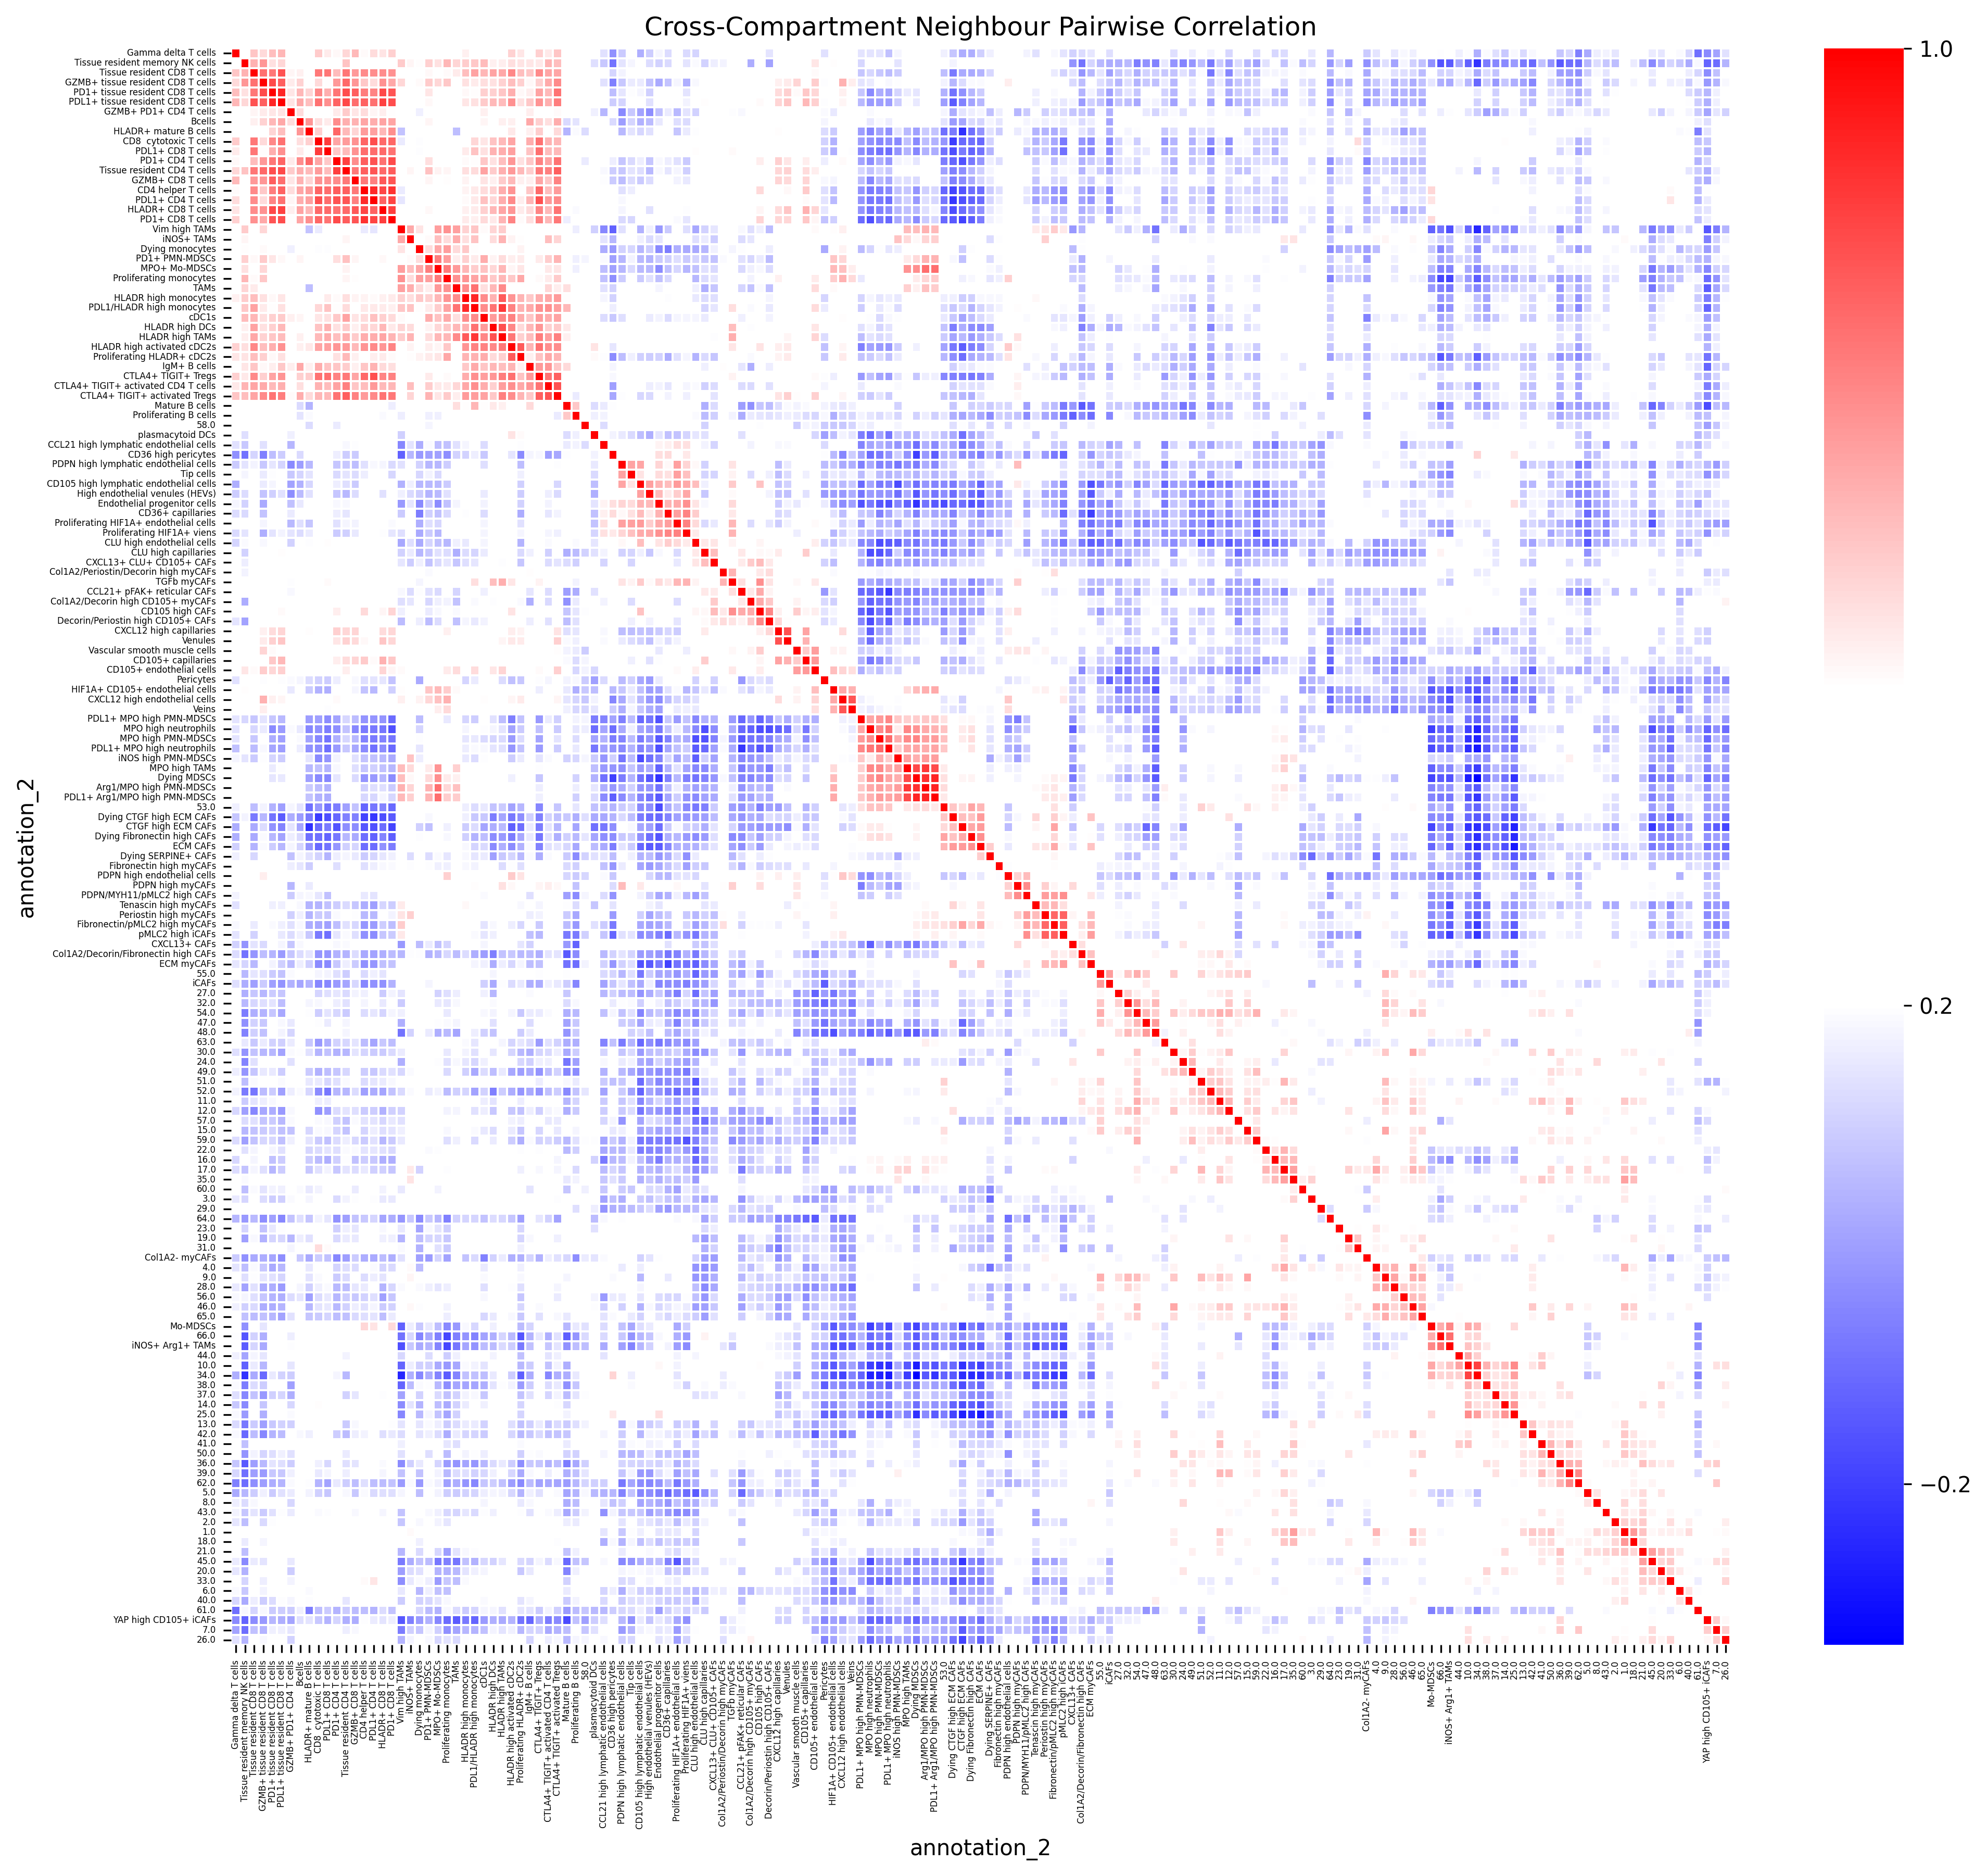

In [282]:
# Define custom colormap for the desired color range with gradual transitions
colors = [
    (0, "blue"),  # Dark blue for the lowest values (below -0.2)
    (0.4, "white"),  # Transition to white as values move from -0.2 to 0
    (0.6, "white"),  # Maintain white between -0.2 and 0.2
    (1, "red")  # Gradual transition to red for values above 0.2
]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Set normalization so that -1 corresponds to blue, -0.2 to 0, and 1 to red
#norm = Normalize(vmin=-1, vmax=1)
#norm = Normalize(vmin=-0.2, vmax=1)

# Plot the heatmap with hierarchical clustering
plt.figure(figsize=(16, 14), dpi=300)
plt.title('Cross-Compartment Neighbour Pairwise Correlation')

#norm=norm

# Use the custom colormap and normalization to apply the gradual color mapping
ax = sns.heatmap(ordered_correlation_matrix, annot=False, cmap=custom_cmap, cbar_kws={"ticks": [-1, -0.2, 0.2, 1]}, linewidths=0.5)

# Adjust the tick parameters to show all labels
ax.set_xticks(np.arange(len(ordered_correlation_matrix.columns)) + 0.5)
ax.set_yticks(np.arange(len(ordered_correlation_matrix.index)) + 0.5)
ax.set_xticklabels(ordered_correlation_matrix.columns, rotation=90, fontsize=4)
ax.set_yticklabels(ordered_correlation_matrix.index, fontsize=4)

# Add padding to ensure labels are not cut off
plt.subplots_adjust(left=0.15, bottom=0.15)

# Save the plot as a PNG file with high resolution
plt.savefig('Cross-Compartment_Neighbour_Pairwise_Correlation_66_scaled2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

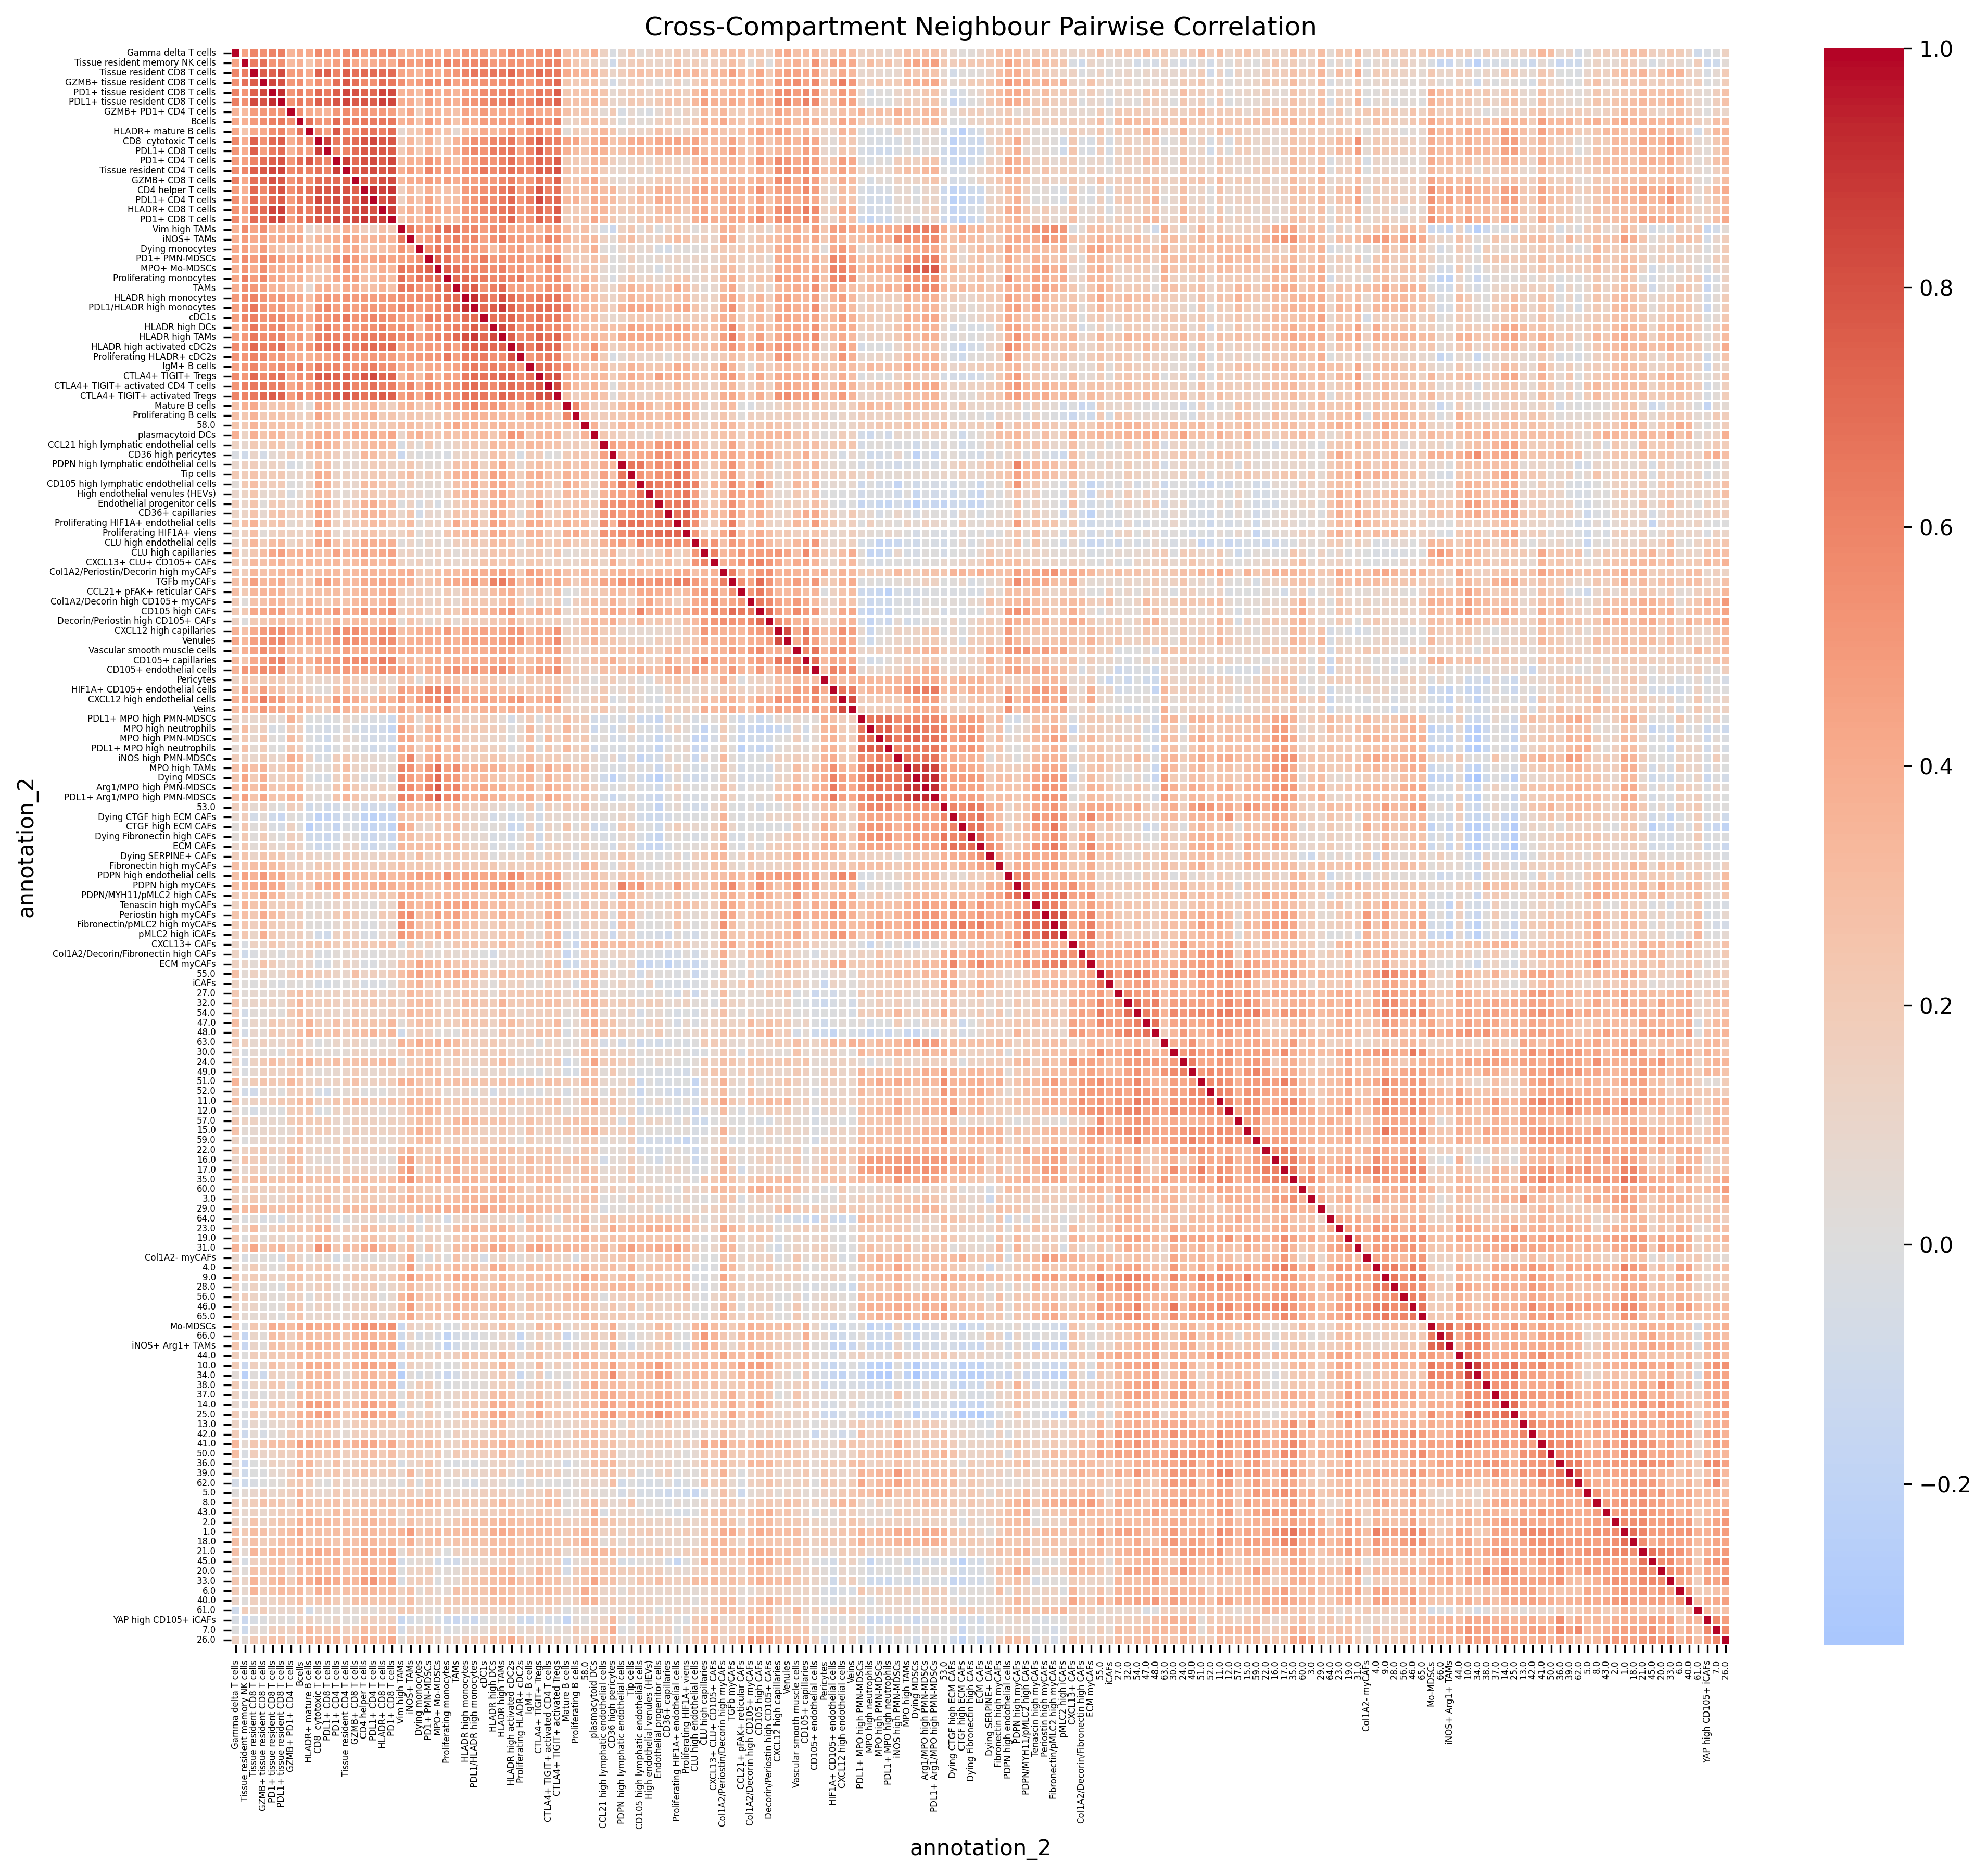

In [261]:
# Generate the dendrogram and get the ordered indices
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_indices = dendro['leaves']

# Reorder the correlation matrix
ordered_correlation_matrix = correlation_matrix.iloc[ordered_indices, ordered_indices]

# Plot the heatmap with hierarchical clustering
plt.figure(figsize=(16, 14), dpi=300)
plt.title('Cross-Compartment Neighbour Pairwise Correlation')
ax = sns.heatmap(ordered_correlation_matrix, annot=False, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
# Adjust the tick parameters to show all labels
ax.set_xticks(np.arange(len(ordered_correlation_matrix.columns)) + 0.5)
ax.set_yticks(np.arange(len(ordered_correlation_matrix.index)) + 0.5)
ax.set_xticklabels(ordered_correlation_matrix.columns, rotation=90, fontsize=4)  # Adjust fontsize if needed
ax.set_yticklabels(ordered_correlation_matrix.index, fontsize=4)  # Adjust fontsize if needed
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.savefig('Cross-Compartment_Neighbour_Pairwise_Correlation_66.png', dpi=300, bbox_inches='tight')
plt.show()

In [283]:
ordered_correlation_matrix.to_csv("crosscompartment_neighbours_correlation_matrix.csv", index=True)

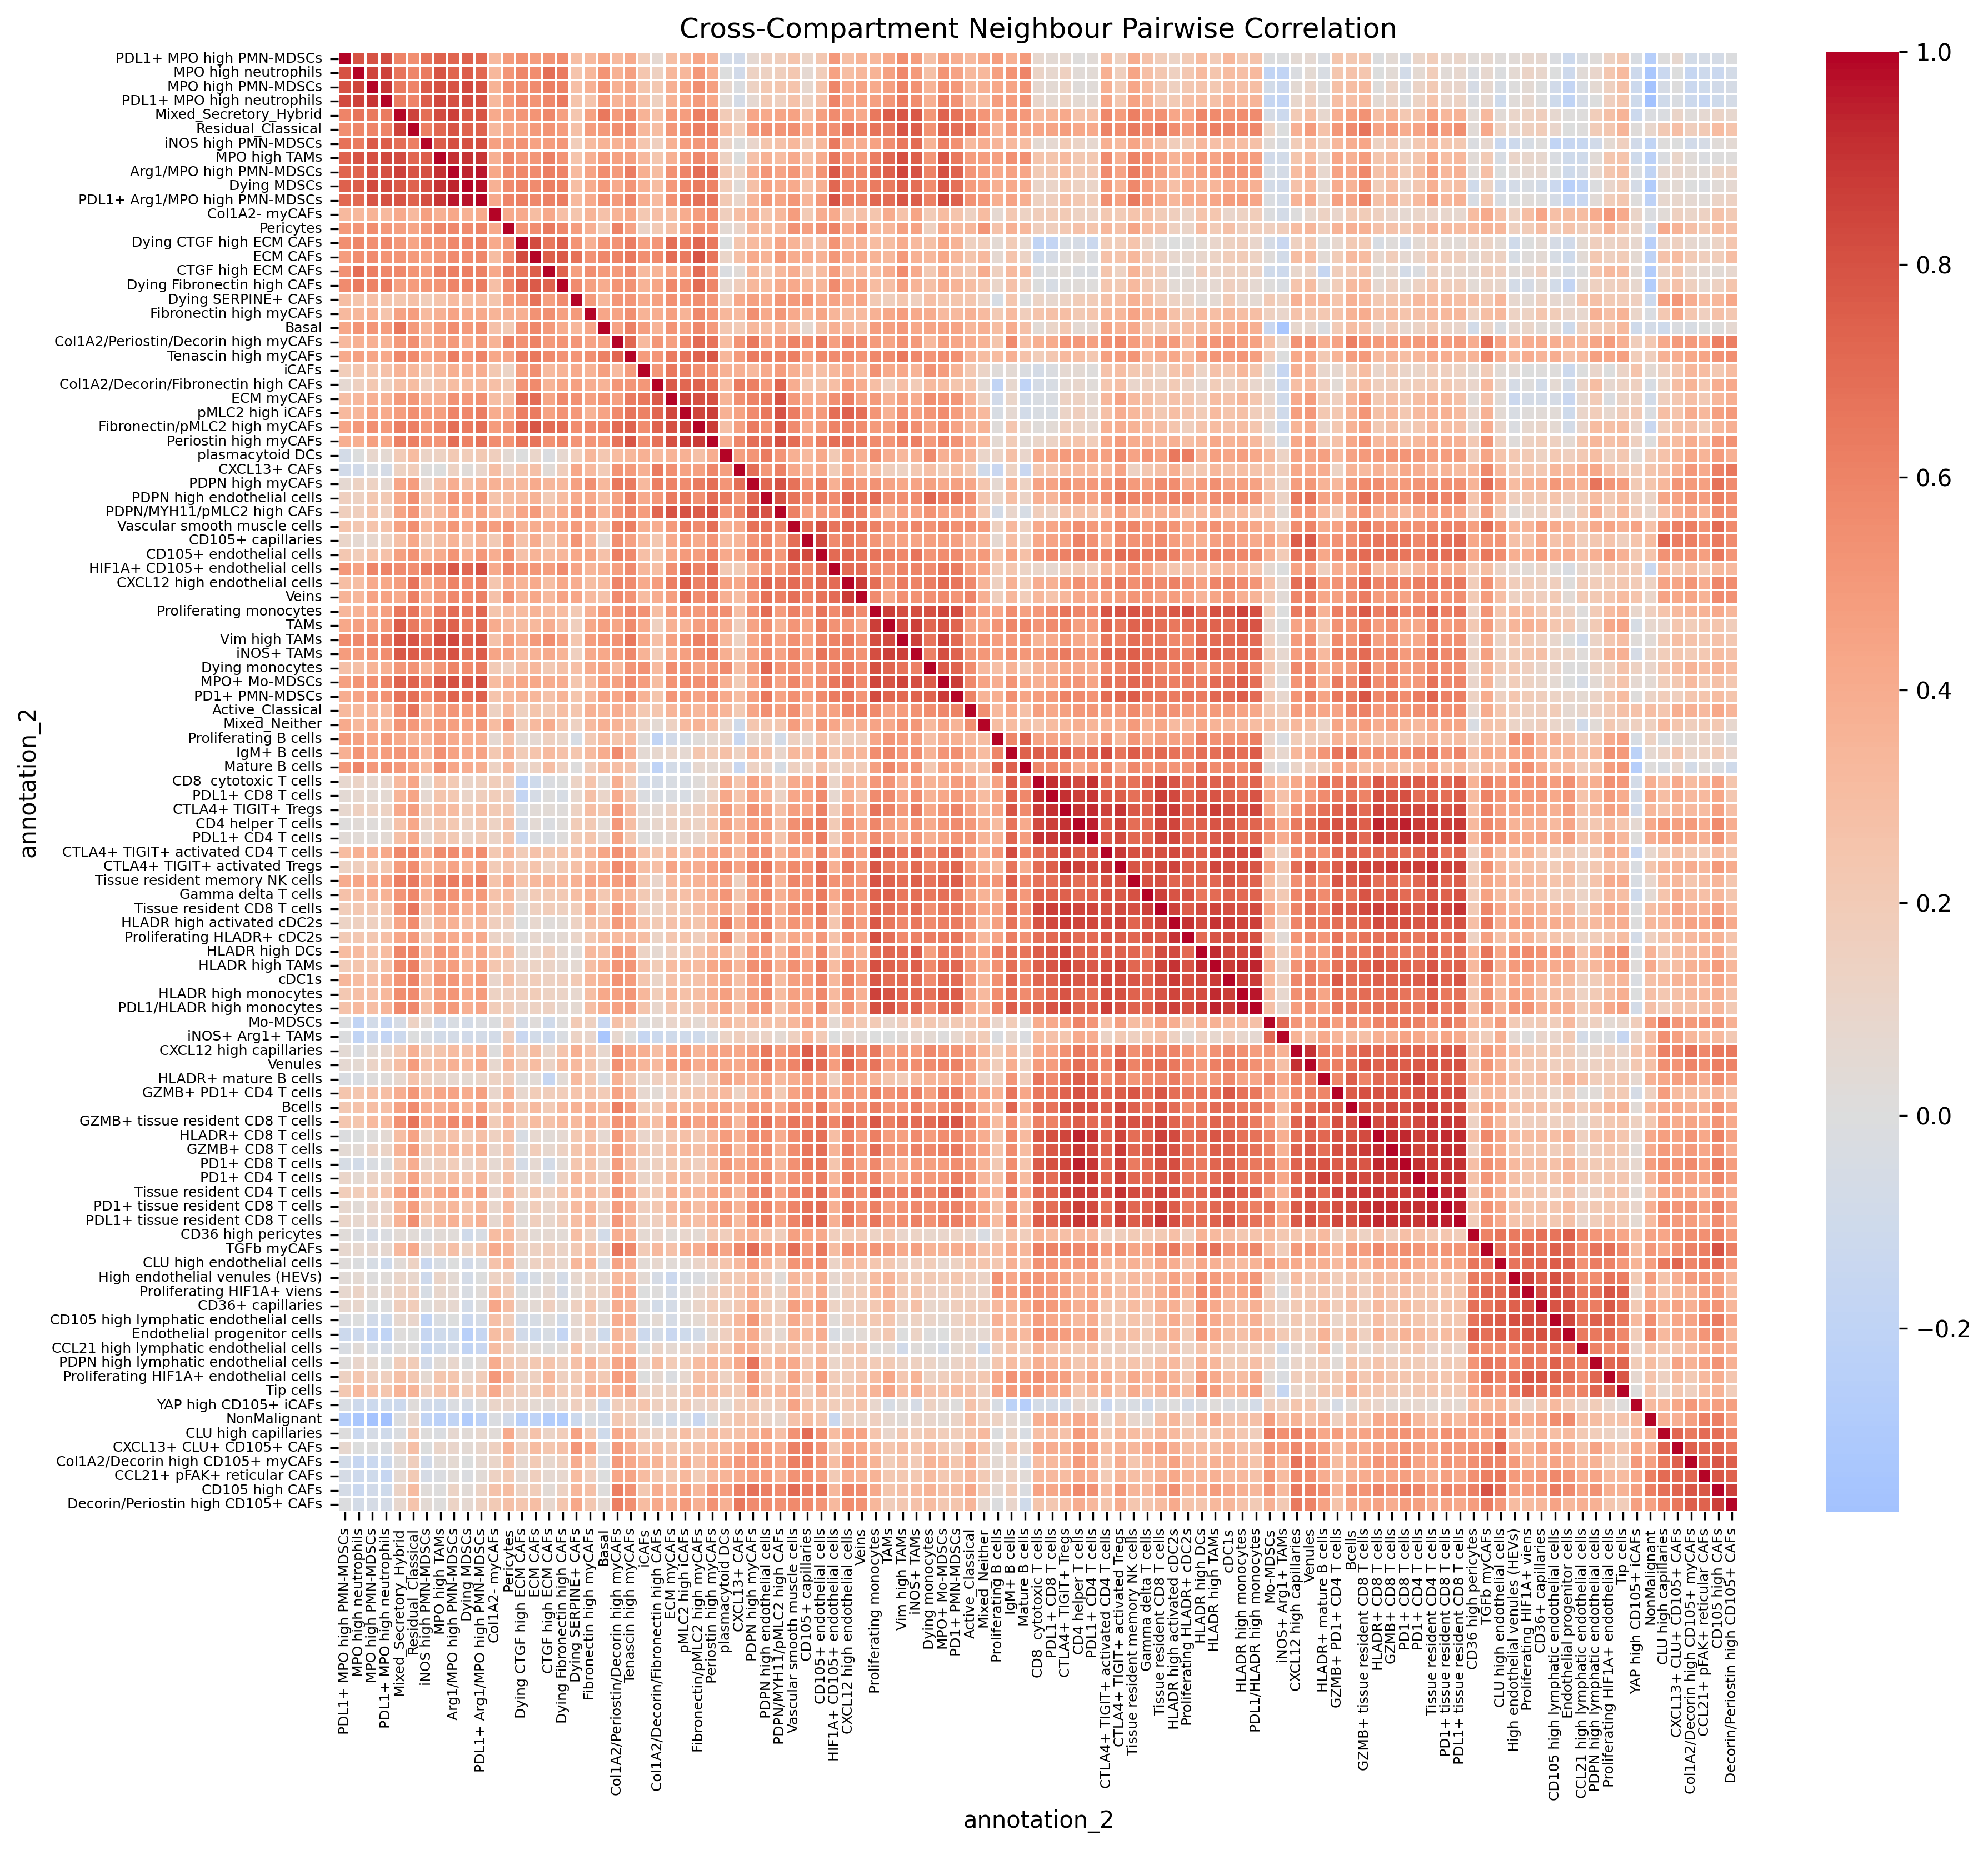

In [239]:
# Generate the dendrogram and get the ordered indices, for 6 ep groups
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_indices = dendro['leaves']

# Reorder the correlation matrix
ordered_correlation_matrix = correlation_matrix.iloc[ordered_indices, ordered_indices]

# Plot the heatmap with hierarchical clustering
plt.figure(figsize=(14, 12), dpi=300)
plt.title('Cross-Compartment Neighbour Pairwise Correlation')
ax = sns.heatmap(ordered_correlation_matrix, annot=False, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)

# Adjust the tick parameters to show all labels
ax.set_xticks(np.arange(len(ordered_correlation_matrix.columns)) + 0.5)
ax.set_yticks(np.arange(len(ordered_correlation_matrix.index)) + 0.5)
ax.set_xticklabels(ordered_correlation_matrix.columns, rotation=90, fontsize=6)  # Adjust fontsize if needed
ax.set_yticklabels(ordered_correlation_matrix.index, fontsize=6)  # Adjust fontsize if needed
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.savefig('Cross-Compartment_Neighbour_Pairwise_Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [168]:
# Load the results DataFrame
#results_df = pd.read_csv("annotation_pair_counts.csv")

# Check for and handle missing values
results_df.dropna(subset=['annotation_1', 'annotation_2', 'count'], inplace=True)

# Ensure the 'count' column is numeric
results_df['count'] = pd.to_numeric(results_df['count'], errors='coerce')
results_df.dropna(subset=['count'], inplace=True)

# Create a contingency table of annotation pairs
contingency_table = pd.crosstab(results_df['annotation_1'], results_df['annotation_2'], values=results_df['count'], aggfunc=np.sum, dropna=False)

# Check for empty cells in the contingency table
print("Contingency Table:")

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)

# Output the results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
#print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Determine if the p-value is significant
alpha = 0.05
if p < alpha:
    print("There is a significant association between annotation_1 and annotation_2.")
else:
    print("There is no significant association between annotation_1 and annotation_2.")

Contingency Table:
Chi-Square Statistic: nan
P-Value: nan
Degrees of Freedom: 4992
Expected Frequencies Table:
There is no significant association between annotation_1 and annotation_2.
